# Codigo base

In [1]:
source("utils.r")

# Cargar datos

In [2]:
# Example of how to call the function
url <- "https://github.com/mbarrena/tesis/raw/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%20DUMMIES%20outliers%20(por%20trimestre).xlsx"
temp_file <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Read the `data` from the Excel file
df_trimestral_crudo <- read_excel(temp_file)

Response [https://raw.githubusercontent.com/mbarrena/tesis/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%20DUMMIES%20outliers%20(por%20trimestre).xlsx]
  Date: 2025-03-24 19:27
  Status: 200
  Content-Type: application/octet-stream
  Size: 57.9 kB
<ON DISK>  /var/folders/59/6k0yx0n916gg1mdb04zs42rm0000gn/T//RtmpcIwBCm/filedddf6f26b5be.xlsxNULL

In [3]:
# Select specific columns and rows from df_trimestral_crudo
df_Arg <- df_trimestral_crudo |> 
  dplyr::slice(37:dplyr::n()) |>  # Equivalent to iloc[36:] (1-based index in R)
  dplyr::select(año, trimestre, ipc_ajust, E, Ebc, pbird, impp_usa, Psoja_USA, Pmaíz_USA, Ptrigo_USA, TOTfmi) |>  # nolint
  as.data.frame()  # Convert to data frame (if needed)

# Rename "ipc_ajust" to "ipc"
df_Arg <- renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

# Display first 6 rows
print(head(df_Arg))

# Display first 65 rows
print(head(df_Arg, 65))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi
1  2.046667 1.0433333   1.736667     NA
2  2.106667 1.1500000   1.743333     NA
3  1.976667 1.1166667   1.723333     NA
4  1.970000 0.9856667   1.780000     NA
5  1.996667 1.0096667   1.800000     NA
6  1.996667 1.0766667   1.786667     NA
    año trimestre          ipc            E          Ebc  pbird impp_usa
1  1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2  1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.251

In [4]:
# Copy df_Arg to df_ERPT_Arg1
df_ERPT_Arg1 <- df_Arg

# Display first rows
print(head(df_ERPT_Arg1))

# Apply logarithm to specific columns
df_ERPT_Arg1 <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg1) # nolint: line_length_linter.

# Display transformed dataframe
print(head(df_ERPT_Arg1))
print(tail(df_ERPT_Arg1))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi
1  2.046667 1.0433333   1.736667     NA
2  2.106667 1.1500000   1.743333     NA
3  1.976667 1.1166667   1.723333     NA
4  1.970000 0.9856667   1.780000     NA
5  1.996667 1.0096667   1.800000     NA
6  1.996667 1.0766667   1.786667     NA
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.51272 12.11605 2.584099 0

In [5]:
# Create df_ERPT_Arg as a copy of df_Arg
df_ERPT_Arg <- df_Arg

# Display first rows
print(head(df_ERPT_Arg))

# Apply logarithm transformation
df_ERPT_Arg <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display transformed dataframe
print(head(df_ERPT_Arg))

# Apply differencing transformation
df_ERPT_Arg <- makeDiffColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display first and last rows
print(head(df_ERPT_Arg))
print(tail(df_ERPT_Arg, 90))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi
1  2.046667 1.0433333   1.736667     NA
2  2.106667 1.1500000   1.743333     NA
3  1.976667 1.1166667   1.723333     NA
4  1.970000 0.9856667   1.780000     NA
5  1.996667 1.0096667   1.800000     NA
6  1.996667 1.0766667   1.786667     NA
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.51272 12.11605 2.584099 0

# Regresiones

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends
1 FALSE       FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

LocalProjection (without exog) - signif 0.95

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.5911110 -1.5911110  -1.5911110 
2  impp_usa E         2      -0.2528529 -1.5524185   1.0467128 
3  impp_usa E         3       0.1901257 -0.7554340   1.1356854 
4  impp_usa E         4      -0.9642976 -1.3667254  -0.5618697 
5  impp_usa E         5       1.1659698 -0.2899871   2.6219267 
6  impp_usa E         6       1.2220744  0.1165672   2.3275816 
7  impp_usa E         7       0.4163343 -0.5106648   1.3433334 
8  impp_usa E         8       1.6931972  0.4650408   2.9213537 
9  impp_usa E         9       1.7547127  0.5320098   2.9774156 
10 impp_usa E        10       1.3091528  0.4404878   2.1778179 
11 impp_usa E        11       1.5557110  0.5472665   2.5641554

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.00000000 0.0000000  
79 ipc     E         2      -0.29320023 -0.75584521 0.1694447  
80 ipc     E         3       0.19370299 -0.22467367 0.6120796  
81 ipc     E         4       0.25200325 -0.29203285 0.7960394  
82 ipc     E         5       0.41088813 -0.03527703 0.8570533  
83 ipc     E         6      -0.14547335 -0.42089993 0.1299532  
84 ipc     E         7       0.11178900 -0.16956069 0.3931387  
85 ipc     E         8       0.08261587 -0.28400038 0.4492321  
86 ipc     E         9      -0.01137341 -0.27412844 0.2513816  
87 ipc     E        10       0.07611969 -0.19365274 0.3458921  
88 ipc     E        11       0.08587932 -0.21154252 0.3833012

impulse response horizon irf_value  lower_bound upper_bound
111 pbird   E         1       0.0000000  0.0000000  0.0000000  
112 pbird   E         2      -0.8095191 -1.7936773  0.1746391  
113 pbird   E         3      -0.4280989 -1.3442051  0.4880072  
114 pbird   E         4      -0.4232555 -1.4027020  0.5561910  
115 pbird   E         5      -0.8539677 -1.9730071  0.2650716  
116 pbird   E         6       0.2383495 -0.6790007  1.1556996  
117 pbird   E         7      -0.5189396 -1.6345268  0.5966476  
118 pbird   E         8      -0.4081681 -1.2038059  0.3874698  
119 pbird   E         9       0.5708209 -0.7242949  1.8659367  
120 pbird   E        10      -0.1466321 -0.9027186  0.6094544  
121 pbird   E        11      -0.3279385 -1.1362713  0.4803944

impulse response horizon irf_value     lower_bound upper_bound
34 E       impp_usa  1       0.0000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.0070250483 -0.03417519 0.02012509 
36 E       impp_usa  3      -0.0051222231 -0.03328030 0.02303585 
37 E       impp_usa  4      -0.0012280121 -0.03339146 0.03093544 
38 E       impp_usa  5      -0.0128539892 -0.05463556 0.02892758 
39 E       impp_usa  6      -0.0067027250 -0.05419736 0.04079191 
40 E       impp_usa  7      -0.0006395801 -0.05694770 0.05566854 
41 E       impp_usa  8      -0.0097655322 -0.04488359 0.02535252 
42 E       impp_usa  9      -0.0035305972 -0.03977499 0.03271380 
43 E       impp_usa 10       0.0030536598 -0.02349136 0.02959867 
44 E       impp_usa 11       0.0054985779 -0.01667436 0.02767151

impulse response horizon irf_value    lower_bound  upper_bound
67 ipc     impp_usa  1       0.000000000  0.000000000 0.00000000 
68 ipc     impp_usa  2       0.014260425 -0.005407817 0.03392867 
69 ipc     impp_usa  3       0.029240979  0.007017602 0.05146436 
70 ipc     impp_usa  4       0.012920998 -0.011968268 0.03781026 
71 ipc     impp_usa  5       0.023636989 -0.007989165 0.05526314 
72 ipc     impp_usa  6       0.028261309 -0.006464818 0.06298744 
73 ipc     impp_usa  7       0.003470354 -0.040163518 0.04710423 
74 ipc     impp_usa  8       0.016776382 -0.009653283 0.04320605 
75 ipc     impp_usa  9       0.019199426 -0.006088878 0.04448773 
76 ipc     impp_usa 10       0.014331203 -0.004901356 0.03356376 
77 ipc     impp_usa 11      -0.005566937 -0.021701683 0.01056781

impulse response horizon irf_value    lower_bound upper_bound 
100 pbird   impp_usa  1       0.000000000  0.00000000  0.000000000
101 pbird   impp_usa  2       0.007163553 -0.10838868  0.122715790
102 pbird   impp_usa  3      -0.006647829 -0.10173382  0.088438165
103 pbird   impp_usa  4      -0.026829240 -0.12841567  0.074757192
104 pbird   impp_usa  5       0.010325376 -0.12872842  0.149379174
105 pbird   impp_usa  6       0.056692686 -0.04159373  0.154979098
106 pbird   impp_usa  7       0.014389295 -0.07470696  0.103485552
107 pbird   impp_usa  8      -0.042154397 -0.15385853  0.069549739
108 pbird   impp_usa  9      -0.136340952 -0.26433240 -0.008349508
109 pbird   impp_usa 10      -0.099307121 -0.20198783  0.003373588
110 pbird   impp_usa 11       0.048157214 -0.05272637  0.149040795

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4851122  0.48511216 0.4851122  
46 E       ipc       2      0.5258947 -0.09069103 1.1424804  
47 E       ipc       3      0.2352006 -0.22350704 0.6939083  
48 E       ipc       4      0.3923228 -0.03412500 0.8187706  
49 E       ipc       5      0.3165317 -0.10130757 0.7343710  
50 E       ipc       6      0.2154824 -0.11669989 0.5476646  
51 E       ipc       7      0.1556498 -0.18494025 0.4962399  
52 E       ipc       8      0.2510669 -0.07060331 0.5727371  
53 E       ipc       9      0.1901872 -0.09474137 0.4751157  
54 E       ipc      10      0.1660602 -0.13890418 0.4710246  
55 E       ipc      11      0.1697846 -0.16593130 0.5055006

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.68849868 -0.68849868 -0.6884987 
13 impp_usa ipc       2       0.04376634 -0.09683213  0.1843648 
14 impp_usa ipc       3       0.50603224 -0.44921048  1.4612750 
15 impp_usa ipc       4      -0.51170591 -0.63728907 -0.3861228 
16 impp_usa ipc       5       0.69082814 -0.03451724  1.4161735 
17 impp_usa ipc       6       0.71077075 -0.29260470  1.7141462 
18 impp_usa ipc       7       0.31069314 -0.15904397  0.7804302 
19 impp_usa ipc       8       1.16063737  0.20294036  2.1183344 
20 impp_usa ipc       9       1.45663106  0.32550068  2.5877614 
21 impp_usa ipc      10       1.15821839  0.26695274  2.0494840 
22 impp_usa ipc      11       1.17972279  0.63493500  1.7245106

impulse response horizon irf_value   lower_bound upper_bound
122 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
123 pbird   ipc       2       0.04161794 -0.3912970  0.4745329  
124 pbird   ipc       3       0.10331900 -0.4196601  0.6262981  
125 pbird   ipc       4      -0.05763357 -0.7173044  0.6020373  
126 pbird   ipc       5      -0.17116447 -1.0093698  0.6670408  
127 pbird   ipc       6      -0.02425056 -0.7564011  0.7079000  
128 pbird   ipc       7      -0.21105121 -0.8493204  0.4272180  
129 pbird   ipc       8      -0.37889871 -1.4102644  0.6524669  
130 pbird   ipc       9       0.48440667 -0.5837294  1.5525427  
131 pbird   ipc      10      -0.06015119 -0.7177040  0.5974016  
132 pbird   ipc      11      -0.26915625 -0.7944349  0.2561224

impulse response horizon irf_value     lower_bound  upper_bound
56 E       pbird     1      -3.799964e-02 -0.037999644 -0.03799964
57 E       pbird     2      -2.191289e-02 -0.065348113  0.02152234
58 E       pbird     3       4.248414e-05 -0.047469733  0.04755470
59 E       pbird     4      -1.736003e-02 -0.056364223  0.02164416
60 E       pbird     5      -7.741167e-04 -0.033154649  0.03160642
61 E       pbird     6       1.199485e-02 -0.016412495  0.04040220
62 E       pbird     7       5.283309e-03 -0.022518998  0.03308562
63 E       pbird     8      -4.992311e-03 -0.049033908  0.03904929
64 E       pbird     9       1.425114e-02 -0.004867316  0.03336959
65 E       pbird    10       6.888008e-03 -0.013139064  0.02691508
66 E       pbird    11       1.692359e-03 -0.028596236  0.03198095

impulse  response horizon irf_value    lower_bound upper_bound 
23 impp_usa pbird     1       0.268611741  0.26861174  0.268611741
24 impp_usa pbird     2       0.034088409 -0.10937577  0.177552583
25 impp_usa pbird     3       0.092927400 -0.01168362  0.197538420
26 impp_usa pbird     4       0.097484335 -0.06376295  0.258731617
27 impp_usa pbird     5      -0.148794453 -0.22846562 -0.069123286
28 impp_usa pbird     6      -0.128585564 -0.19256232 -0.064608806
29 impp_usa pbird     7      -0.052509519 -0.14958378  0.044564742
30 impp_usa pbird     8       0.019807811 -0.01774425  0.057359869
31 impp_usa pbird     9      -0.132764644 -0.26213457 -0.003394723
32 impp_usa pbird    10      -0.001227503 -0.10985950  0.107404498
33 impp_usa pbird    11       0.019856920 -0.03491962  0.074633463

impulse response horizon irf_value    lower_bound   upper_bound
89 ipc     pbird     1      -0.035494060 -0.0354940600 -0.03549406
90 ipc     pbird     2       0.040092487  0.0005998545  0.07958512
91 ipc     pbird     3       0.002681108 -0.0297477371  0.03510995
92 ipc     pbird     4       0.000788603 -0.0340749951  0.03565220
93 ipc     pbird     5       0.011379776 -0.0145146759  0.03727423
94 ipc     pbird     6       0.002929230 -0.0184902011  0.02434866
95 ipc     pbird     7      -0.010422500 -0.0336382503  0.01279325
96 ipc     pbird     8      -0.010390692 -0.0526231451  0.03184176
97 ipc     pbird     9      -0.004663773 -0.0201248067  0.01079726
98 ipc     pbird    10       0.002611187 -0.0144898176  0.01971219
99 ipc     pbird    11      -0.001434687 -0.0204222837  0.01755291

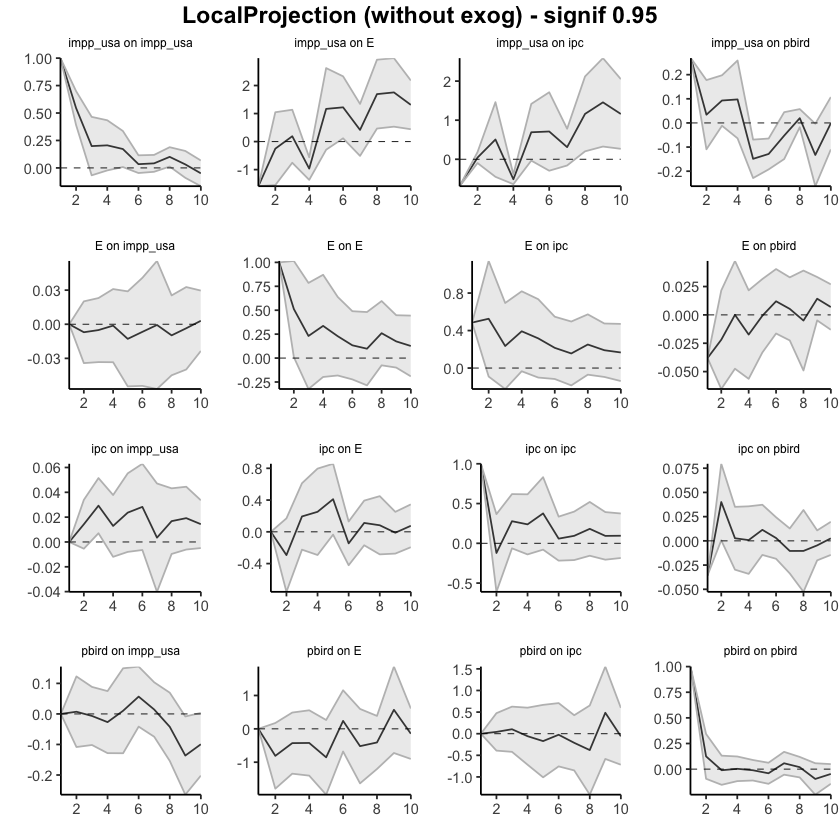

In [6]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 2, horizons=10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends
1 FALSE       FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 1   1   1   1   1   1   1   1   1   1   
2 E        2   2   2   1   2   2   1   1   1   1   
3 ipc      2   2   2   1   2   2   1   1   1   1   
4 pbird    2   2   2   1   1   1   2   1   1   1

LocalProjection (without exog) - Cumulative - signif 0.95

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.5911110 -1.591111   -1.5911110 
2  impp_usa E         2      -1.8439639 -3.143530   -0.5443982 
3  impp_usa E         3      -1.6538381 -3.898964    0.5912872 
4  impp_usa E         4      -2.6181357 -5.265689    0.0294175 
5  impp_usa E         5      -1.4521660 -5.555676    2.6513442 
6  impp_usa E         6      -0.2300916 -5.439109    4.9789258 
7  impp_usa E         7       0.1862427 -5.949774    6.3222592 
8  impp_usa E         8       1.8794400 -5.484733    9.2436128 
9  impp_usa E         9       3.6341526 -4.952723   12.2210284 
10 impp_usa E        10       4.9433055 -4.512235   14.3988463 
11 impp_usa E        11       6.4990164 -3.964969   16.9630017

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.0000000  0.0000000  
79 ipc     E         2      -0.29320023 -0.7558452  0.1694447  
80 ipc     E         3      -0.09949725 -0.9805189  0.7815244  
81 ipc     E         4       0.15250600 -1.2725517  1.5775637  
82 ipc     E         5       0.56339413 -1.3078288  2.4346170  
83 ipc     E         6       0.41792078 -1.7287287  2.5645703  
84 ipc     E         7       0.52970978 -1.8982894  2.9577089  
85 ipc     E         8       0.61232565 -2.1822898  3.4069411  
86 ipc     E         9       0.60095224 -2.4564182  3.6583227  
87 ipc     E        10       0.67707193 -2.6500709  4.0042148  
88 ipc     E        11       0.76295125 -2.8616135  4.3875160

impulse response horizon irf_value  lower_bound upper_bound
111 pbird   E         1       0.0000000   0.000000  0.0000000  
112 pbird   E         2      -0.8095191  -1.793677  0.1746391  
113 pbird   E         3      -1.2376181  -3.137882  0.6626463  
114 pbird   E         4      -1.6608736  -4.540584  1.2188373  
115 pbird   E         5      -2.5148413  -6.513592  1.4839089  
116 pbird   E         6      -2.2764918  -7.192592  2.6396086  
117 pbird   E         7      -2.7954314  -8.827119  3.2362561  
118 pbird   E         8      -3.2035995 -10.030925  3.6237259  
119 pbird   E         9      -2.6327786 -10.755220  5.4896626  
120 pbird   E        10      -2.7794107 -11.657938  6.0991170  
121 pbird   E        11      -3.1073491 -12.794210  6.5795114

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.007025048 -0.03417519 0.02012509 
36 E       impp_usa  3      -0.012147271 -0.06745549 0.04316095 
37 E       impp_usa  4      -0.013375283 -0.10084695 0.07409638 
38 E       impp_usa  5      -0.026229273 -0.15548251 0.10302396 
39 E       impp_usa  6      -0.032931998 -0.20967987 0.14381587 
40 E       impp_usa  7      -0.033571578 -0.26662757 0.19948441 
41 E       impp_usa  8      -0.043337110 -0.31151116 0.22483694 
42 E       impp_usa  9      -0.046867707 -0.35128615 0.25755073 
43 E       impp_usa 10      -0.043814047 -0.37477750 0.28714941 
44 E       impp_usa 11      -0.038315469 -0.39145186 0.31482092

impulse response horizon irf_value  lower_bound  upper_bound
67 ipc     impp_usa  1      0.00000000  0.000000000 0.00000000 
68 ipc     impp_usa  2      0.01426042 -0.005407817 0.03392867 
69 ipc     impp_usa  3      0.04350140  0.001609786 0.08539302 
70 ipc     impp_usa  4      0.05642240 -0.010358483 0.12320329 
71 ipc     impp_usa  5      0.08005939 -0.018347648 0.17846643 
72 ipc     impp_usa  6      0.10832070 -0.024812466 0.24145387 
73 ipc     impp_usa  7      0.11179105 -0.064975983 0.28855809 
74 ipc     impp_usa  8      0.12856744 -0.074629267 0.33176414 
75 ipc     impp_usa  9      0.14776686 -0.080718145 0.37625187 
76 ipc     impp_usa 10      0.16209807 -0.085619501 0.40981563 
77 ipc     impp_usa 11      0.15653113 -0.107321184 0.42038344

impulse response horizon irf_value     lower_bound upper_bound
100 pbird   impp_usa  1       0.0000000000  0.0000000  0.0000000  
101 pbird   impp_usa  2       0.0071635531 -0.1083887  0.1227158  
102 pbird   impp_usa  3       0.0005157239 -0.2101225  0.2111540  
103 pbird   impp_usa  4      -0.0263135157 -0.3385382  0.2859111  
104 pbird   impp_usa  5      -0.0159881394 -0.4672666  0.4352903  
105 pbird   impp_usa  6       0.0407045464 -0.5088603  0.5902694  
106 pbird   impp_usa  7       0.0550938415 -0.5835673  0.6937550  
107 pbird   impp_usa  8       0.0129394450 -0.7374258  0.7633047  
108 pbird   impp_usa  9      -0.1234015065 -1.0017582  0.7549552  
109 pbird   impp_usa 10      -0.2227086275 -1.2037460  0.7583288  
110 pbird   impp_usa 11      -0.1745514138 -1.2564724  0.9073696

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4851122  0.48511216 0.4851122  
46 E       ipc       2      1.0110068  0.39442113 1.6275925  
47 E       ipc       3      1.2462074  0.17091409 2.3215008  
48 E       ipc       4      1.6385302  0.13678910 3.1402714  
49 E       ipc       5      1.9550619  0.03548153 3.8746424  
50 E       ipc       6      2.1705443 -0.08121836 4.4223070  
51 E       ipc       7      2.3261942 -0.26615861 4.9185469  
52 E       ipc       8      2.5772611 -0.33676192 5.4912840  
53 E       ipc       9      2.7674482 -0.43150328 5.9663998  
54 E       ipc      10      2.9335085 -0.57040747 6.4374244  
55 E       ipc      11      3.1032931 -0.73633877 6.9429250

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.68849868 -0.6884987  -0.6884987 
13 impp_usa ipc       2      -0.64473234 -0.7853308  -0.5041339 
14 impp_usa ipc       3      -0.13870010 -1.2345413   0.9571411 
15 impp_usa ipc       4      -0.65040602 -1.8718304   0.5710183 
16 impp_usa ipc       5       0.04042212 -1.9063476   1.9871918 
17 impp_usa ipc       6       0.75119287 -2.1989523   3.7013380 
18 impp_usa ipc       7       1.06188601 -2.3579963   4.4817683 
19 impp_usa ipc       8       2.22252337 -2.1550559   6.6001026 
20 impp_usa ipc       9       3.67915443 -1.8295552   9.1878641 
21 impp_usa ipc      10       4.83737282 -1.5626025  11.2373481 
22 impp_usa ipc      11       6.01709561 -0.9276675  12.9618587

impulse response horizon irf_value   lower_bound upper_bound
122 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
123 pbird   ipc       2       0.04161794 -0.3912970  0.4745329  
124 pbird   ipc       3       0.14493694 -0.8109571  1.1008310  
125 pbird   ipc       4       0.08730337 -1.5282615  1.7028683  
126 pbird   ipc       5      -0.08386110 -2.5376313  2.3699091  
127 pbird   ipc       6      -0.10811166 -3.2940324  3.0778091  
128 pbird   ipc       7      -0.31916287 -4.1433528  3.5050271  
129 pbird   ipc       8      -0.69806158 -5.5536172  4.1574940  
130 pbird   ipc       9      -0.21365491 -6.1373466  5.7100368  
131 pbird   ipc      10      -0.27380611 -6.8550506  6.3074384  
132 pbird   ipc      11      -0.54296236 -7.6494854  6.5635607

impulse response horizon irf_value   lower_bound upper_bound
56 E       pbird     1      -0.03799964 -0.03799964 -0.03799964
57 E       pbird     2      -0.05991253 -0.10334776 -0.01647731
58 E       pbird     3      -0.05987005 -0.15081749  0.03107739
59 E       pbird     4      -0.07723008 -0.20718171  0.05272155
60 E       pbird     5      -0.07800420 -0.24033636  0.08432797
61 E       pbird     6      -0.06600934 -0.25674886  0.12473017
62 E       pbird     7      -0.06072603 -0.27926786  0.15781579
63 E       pbird     8      -0.06571835 -0.32830176  0.19686507
64 E       pbird     9      -0.05146721 -0.33316908  0.23023466
65 E       pbird    10      -0.04457920 -0.34630814  0.25714974
66 E       pbird    11      -0.04288684 -0.37490438  0.28913069

impulse  response horizon irf_value  lower_bound upper_bound
23 impp_usa pbird     1      0.26861174  0.26861174 0.2686117  
24 impp_usa pbird     2      0.30270015  0.15923598 0.4461643  
25 impp_usa pbird     3      0.39562755  0.14755236 0.6437027  
26 impp_usa pbird     4      0.49311188  0.08378941 0.9024344  
27 impp_usa pbird     5      0.34431743 -0.14467621 0.8333111  
28 impp_usa pbird     6      0.21573187 -0.33723853 0.7687023  
29 impp_usa pbird     7      0.16322235 -0.48682231 0.8132670  
30 impp_usa pbird     8      0.18303016 -0.50456656 0.8706269  
31 impp_usa pbird     9      0.05026551 -0.76670113 0.8672322  
32 impp_usa pbird    10      0.04903801 -0.87656063 0.9746367  
33 impp_usa pbird    11      0.06889493 -0.91148025 1.0492701

impulse response horizon irf_value     lower_bound upper_bound
89 ipc     pbird     1      -0.0354940600 -0.03549406 -0.03549406
90 ipc     pbird     2       0.0045984265 -0.03489421  0.04409106
91 ipc     pbird     3       0.0072795349 -0.06464194  0.07920101
92 ipc     pbird     4       0.0080681379 -0.09871694  0.11485321
93 ipc     pbird     5       0.0194479138 -0.11323161  0.15212744
94 ipc     pbird     6       0.0223771437 -0.13172181  0.17647610
95 ipc     pbird     7       0.0119546437 -0.16536006  0.18926935
96 ipc     pbird     8       0.0015639520 -0.21798321  0.22111111
97 ipc     pbird     9      -0.0030998207 -0.23810802  0.23190838
98 ipc     pbird    10      -0.0004886332 -0.25259783  0.25162057
99 ipc     pbird    11      -0.0019233200 -0.27302012  0.26917348

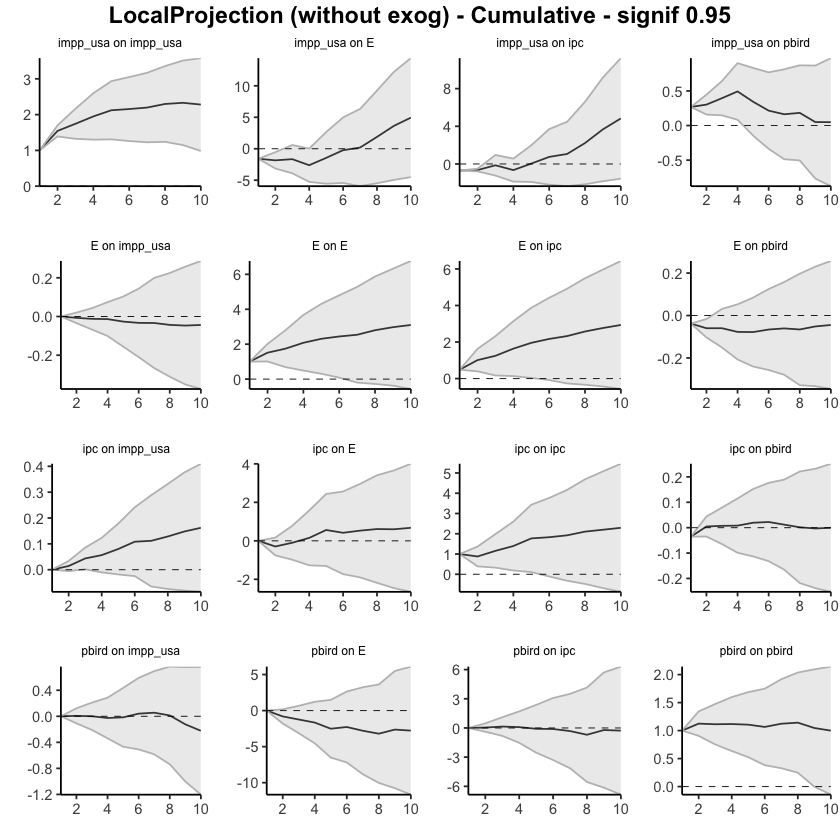

In [7]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 2, horizons=10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends
1 FALSE       FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

LocalProjection (without exog) - signif 0.95

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.5446308 -1.5446308  -1.5446308 
2  impp_usa E         2      -0.2954806 -1.7131897   1.1222285 
3  impp_usa E         3       0.3351997 -0.7774561   1.4478554 
4  impp_usa E         4      -0.6853284 -1.3169637  -0.0536931 
5  impp_usa E         5       1.2015051 -0.3707639   2.7737741 
6  impp_usa E         6       1.3697783  0.2540676   2.4854889 
7  impp_usa E         7       0.4178335 -0.6023486   1.4380157 
8  impp_usa E         8       1.7021818  0.3827670   3.0215967 
9  impp_usa E         9       1.7808865  0.4663869   3.0953861 
10 impp_usa E        10       1.3200324  0.3750870   2.2649778 
11 impp_usa E        11       1.5621106  0.4697754   2.6544458

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.00000000 0.0000000  
79 ipc     E         2      -0.28833272 -0.74506011 0.1683947  
80 ipc     E         3       0.17334734 -0.18154307 0.5282378  
81 ipc     E         4       0.42761175 -0.06121036 0.9164339  
82 ipc     E         5       0.41602291 -0.02341364 0.8554595  
83 ipc     E         6      -0.15750382 -0.46801141 0.1530038  
84 ipc     E         7       0.11490931 -0.15973253 0.3895511  
85 ipc     E         8       0.08507012 -0.27676208 0.4469023  
86 ipc     E         9      -0.01480567 -0.26977336 0.2401620  
87 ipc     E        10       0.07700136 -0.18822483 0.3422276  
88 ipc     E        11       0.08785116 -0.20471030 0.3804126

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000  0.0000000  0.0000000  
112 pbird   E         2      -0.80951912 -1.7936773  0.1746391  
113 pbird   E         3      -0.72333711 -1.7664892  0.3198150  
114 pbird   E         4      -0.52561731 -1.5907835  0.5395489  
115 pbird   E         5      -0.85396773 -1.9730071  0.2650716  
116 pbird   E         6       0.04081861 -0.8500787  0.9317159  
117 pbird   E         7      -0.51893962 -1.6345268  0.5966476  
118 pbird   E         8      -0.40816806 -1.2038059  0.3874698  
119 pbird   E         9       0.57082087 -0.7242949  1.8659367  
120 pbird   E        10      -0.14663208 -0.9027186  0.6094544  
121 pbird   E        11      -0.32793846 -1.1362713  0.4803944

impulse response horizon irf_value     lower_bound upper_bound
34 E       impp_usa  1       0.0000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.0036469631 -0.03082042 0.02352650 
36 E       impp_usa  3      -0.0053499758 -0.03346628 0.02276633 
37 E       impp_usa  4      -0.0013599843 -0.03347022 0.03075025 
38 E       impp_usa  5      -0.0130175047 -0.05474454 0.02870953 
39 E       impp_usa  6      -0.0068400712 -0.05420348 0.04052334 
40 E       impp_usa  7      -0.0006467044 -0.05674483 0.05545142 
41 E       impp_usa  8      -0.0099464820 -0.04501305 0.02512009 
42 E       impp_usa  9      -0.0038532185 -0.04007604 0.03236961 
43 E       impp_usa 10       0.0028160728 -0.02371954 0.02935168 
44 E       impp_usa 11       0.0056034340 -0.01658095 0.02778781

impulse response horizon irf_value    lower_bound  upper_bound
67 ipc     impp_usa  1       0.000000000  0.000000000 0.000000000
68 ipc     impp_usa  2       0.015947489 -0.009436875 0.041331854
69 ipc     impp_usa  3       0.029280951  0.007629312 0.050932590
70 ipc     impp_usa  4       0.013082318 -0.011196125 0.037360761
71 ipc     impp_usa  5       0.023574904 -0.007215141 0.054364950
72 ipc     impp_usa  6       0.027920424 -0.006214721 0.062055570
73 ipc     impp_usa  7       0.003383834 -0.039714316 0.046481983
74 ipc     impp_usa  8       0.017029850 -0.008728156 0.042787855
75 ipc     impp_usa  9       0.020019223 -0.004499488 0.044537935
76 ipc     impp_usa 10       0.014928322 -0.003686834 0.033543477
77 ipc     impp_usa 11      -0.005856499 -0.021384648 0.009671649

impulse response horizon irf_value    lower_bound upper_bound 
100 pbird   impp_usa  1       0.000000000  0.00000000  0.000000000
101 pbird   impp_usa  2      -0.020033397 -0.14489109  0.104824299
102 pbird   impp_usa  3      -0.006647829 -0.10173382  0.088438165
103 pbird   impp_usa  4      -0.026829240 -0.12841567  0.074757192
104 pbird   impp_usa  5       0.010325376 -0.12872842  0.149379174
105 pbird   impp_usa  6       0.056692686 -0.04159373  0.154979098
106 pbird   impp_usa  7       0.014389295 -0.07470696  0.103485552
107 pbird   impp_usa  8      -0.042154397 -0.15385853  0.069549739
108 pbird   impp_usa  9      -0.136340952 -0.26433240 -0.008349508
109 pbird   impp_usa 10      -0.099307121 -0.20198783  0.003373588
110 pbird   impp_usa 11       0.048157214 -0.05272637  0.149040795

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4776215  0.47762149 0.4776215  
46 E       ipc       2      0.4953727 -0.08680653 1.0775519  
47 E       ipc       3      0.2332543 -0.22358564 0.6900942  
48 E       ipc       4      0.3904624 -0.03402086 0.8149457  
49 E       ipc       5      0.3134915 -0.10203559 0.7290186  
50 E       ipc       6      0.2074506 -0.10367027 0.5185714  
51 E       ipc       7      0.1546680 -0.18447640 0.4938125  
52 E       ipc       8      0.2492073 -0.07128373 0.5696984  
53 E       ipc       9      0.1901229 -0.09396597 0.4742117  
54 E       ipc      10      0.1652672 -0.13846434 0.4689988  
55 E       ipc      11      0.1687324 -0.16552872 0.5029936

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.53402793 -0.53402793 -0.53402793
13 impp_usa ipc       2      -0.06208025 -0.20119327  0.07703276
14 impp_usa ipc       3       0.55717213 -0.48230051  1.59664476
15 impp_usa ipc       4      -0.46401384 -0.68187778 -0.24614990
16 impp_usa ipc       5       0.74925929 -0.08433558  1.58285416
17 impp_usa ipc       6       0.83402343 -0.21397885  1.88202571
18 impp_usa ipc       7       0.32310617 -0.22455456  0.87076691
19 impp_usa ipc       8       1.18331055  0.13070196  2.23591914
20 impp_usa ipc       9       1.49440552  0.27393889  2.71487215
21 impp_usa ipc      10       1.17645079  0.21155855  2.14134304
22 impp_usa ipc      11       1.19069772  0.57453699  1.80685845

impulse response horizon irf_value   lower_bound upper_bound
122 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
123 pbird   ipc       2       0.01512334 -0.4225984  0.4528451  
124 pbird   ipc       3       0.10331900 -0.4196601  0.6262981  
125 pbird   ipc       4      -0.05763357 -0.7173044  0.6020373  
126 pbird   ipc       5      -0.17116447 -1.0093698  0.6670408  
127 pbird   ipc       6      -0.16995519 -0.9776630  0.6377526  
128 pbird   ipc       7      -0.21105121 -0.8493204  0.4272180  
129 pbird   ipc       8      -0.37889871 -1.4102644  0.6524669  
130 pbird   ipc       9       0.48440667 -0.5837294  1.5525427  
131 pbird   ipc      10      -0.06015119 -0.7177040  0.5974016  
132 pbird   ipc      11      -0.26915625 -0.7944349  0.2561224

impulse response horizon irf_value    lower_bound  upper_bound
56 E       pbird     1      -0.036422317 -0.036422317 -0.03642232
57 E       pbird     2      -0.020660346 -0.063467459  0.02214677
58 E       pbird     3      -0.002626526 -0.042833357  0.03758030
59 E       pbird     4      -0.017361680 -0.056262317  0.02153896
60 E       pbird     5      -0.000873589 -0.033191244  0.03144407
61 E       pbird     6       0.011919799 -0.016461732  0.04030133
62 E       pbird     7       0.005436463 -0.022337908  0.03321083
63 E       pbird     8      -0.004889167 -0.048745485  0.03896715
64 E       pbird     9       0.014160523 -0.005043012  0.03336406
65 E       pbird    10       0.006806924 -0.013217792  0.02683164
66 E       pbird    11       0.001642824 -0.028694967  0.03198062

impulse  response horizon irf_value    lower_bound upper_bound 
23 impp_usa pbird     1       0.296459744  0.29645974  0.296459744
24 impp_usa pbird     2       0.034912968 -0.10720689  0.177032821
25 impp_usa pbird     3       0.063799898 -0.06287783  0.190477631
26 impp_usa pbird     4       0.096892884 -0.07488810  0.268673865
27 impp_usa pbird     5      -0.147701327 -0.23572181 -0.059680848
28 impp_usa pbird     6      -0.129030585 -0.20067419 -0.057386977
29 impp_usa pbird     7      -0.051675391 -0.15692182  0.053571038
30 impp_usa pbird     8       0.018866909 -0.02973132  0.067465137
31 impp_usa pbird     9      -0.136000804 -0.27355278  0.001551173
32 impp_usa pbird    10      -0.002171852 -0.11727909  0.112935388
33 impp_usa pbird    11       0.018169865 -0.04552551  0.081865245

impulse response horizon irf_value     lower_bound  upper_bound
89 ipc     pbird     1      -0.0415069066 -0.041506907 -0.04150691
90 ipc     pbird     2       0.0345438866 -0.003248139  0.07233591
91 ipc     pbird     3      -0.0046165366 -0.029119755  0.01988668
92 ipc     pbird     4       0.0007690703 -0.033371956  0.03491010
93 ipc     pbird     5       0.0114450192 -0.013848407  0.03673845
94 ipc     pbird     6       0.0031727431 -0.017629433  0.02397492
95 ipc     pbird     7      -0.0107667419 -0.033313262  0.01177978
96 ipc     pbird     8      -0.0105067366 -0.052138252  0.03112478
97 ipc     pbird     9      -0.0040881497 -0.018628102  0.01045180
98 ipc     pbird    10       0.0028932714 -0.013631222  0.01941776
99 ipc     pbird    11      -0.0011583062 -0.019268237  0.01695162

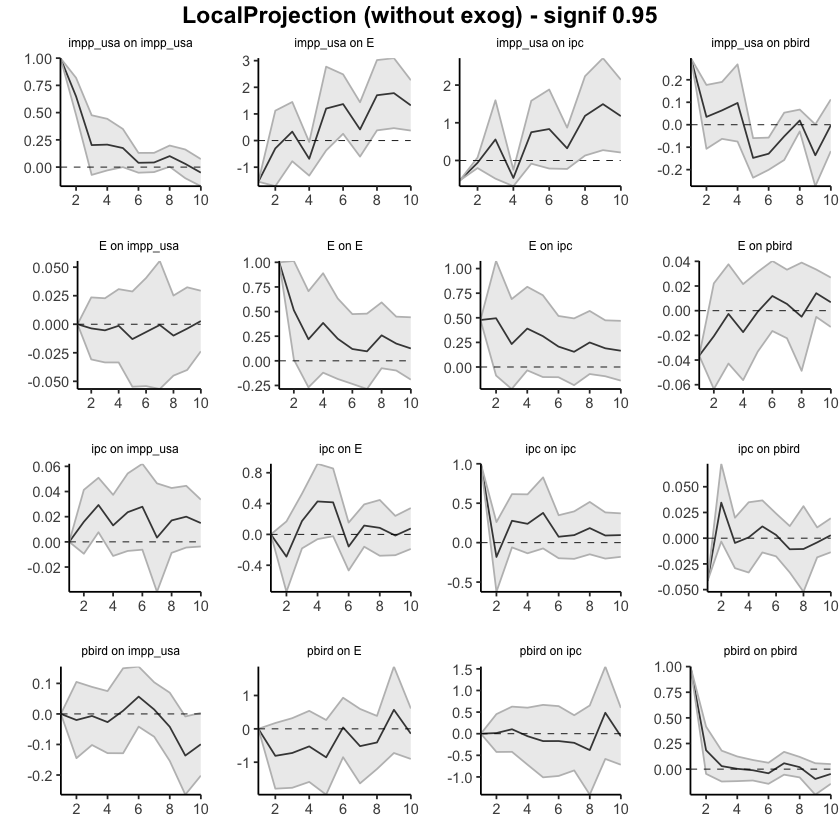

In [8]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 3, horizons=10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends
1 FALSE       FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        2   3   3   1   3   2   1   1   1   1   
3 ipc      3   2   2   1   3   2   1   1   1   1   
4 pbird    3   3   2   1   1   1   2   1   1   1

LocalProjection (without exog) - Cumulative - signif 0.95

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.5446308 -1.544631   -1.5446308 
2  impp_usa E         2      -1.8401114 -3.257821   -0.4224023 
3  impp_usa E         3      -1.5049117 -4.035277    1.0254531 
4  impp_usa E         4      -2.1902401 -5.352240    0.9717600 
5  impp_usa E         5      -0.9887350 -5.723004    3.7455341 
6  impp_usa E         6       0.3810432 -5.468937    6.2310230 
7  impp_usa E         7       0.7988768 -6.071285    7.6690387 
8  impp_usa E         8       2.5010586 -5.688518   10.6906354 
9  impp_usa E         9       4.2819451 -5.222131   13.7860215 
10 impp_usa E        10       5.6019775 -4.847044   16.0509993 
11 impp_usa E        11       7.1640881 -4.377269   18.7054451

impulse response horizon irf_value  lower_bound upper_bound
78 ipc     E         1       0.0000000  0.0000000  0.0000000  
79 ipc     E         2      -0.2883327 -0.7450601  0.1683947  
80 ipc     E         3      -0.1149854 -0.9266032  0.6966324  
81 ipc     E         4       0.3126264 -0.9878135  1.6130663  
82 ipc     E         5       0.7286493 -1.0112272  2.4685258  
83 ipc     E         6       0.5711455 -1.4792386  2.6215295  
84 ipc     E         7       0.6860548 -1.6389711  3.0110807  
85 ipc     E         8       0.7711249 -1.9157332  3.4579830  
86 ipc     E         9       0.7563192 -2.1855066  3.6981450  
87 ipc     E        10       0.8333206 -2.3737314  4.0403726  
88 ipc     E        11       0.9211717 -2.5784417  4.4207852

impulse response horizon irf_value  lower_bound upper_bound
111 pbird   E         1       0.0000000   0.000000  0.0000000  
112 pbird   E         2      -0.8095191  -1.793677  0.1746391  
113 pbird   E         3      -1.5328562  -3.560167  0.4944541  
114 pbird   E         4      -2.0584735  -5.150950  1.0340030  
115 pbird   E         5      -2.9124413  -7.123957  1.2990746  
116 pbird   E         6      -2.8716227  -7.974036  2.2307905  
117 pbird   E         7      -3.3905623  -9.608563  2.8274381  
118 pbird   E         8      -3.7987303 -10.812369  3.2149079  
119 pbird   E         9      -3.2279095 -11.536663  5.0808445  
120 pbird   E        10      -3.3745415 -12.439382  5.6902990  
121 pbird   E        11      -3.7024800 -13.575653  6.1706934

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.003646963 -0.03082042 0.02352650 
36 E       impp_usa  3      -0.008996939 -0.06428671 0.04629283 
37 E       impp_usa  4      -0.010356923 -0.09775693 0.07704308 
38 E       impp_usa  5      -0.023374428 -0.15250147 0.10575261 
39 E       impp_usa  6      -0.030214499 -0.20670495 0.14627595 
40 E       impp_usa  7      -0.030861204 -0.26344977 0.20172737 
41 E       impp_usa  8      -0.040807686 -0.30846283 0.22684746 
42 E       impp_usa  9      -0.044660904 -0.34853887 0.25921706 
43 E       impp_usa 10      -0.041844831 -0.37225841 0.28856875 
44 E       impp_usa 11      -0.036241397 -0.38883935 0.31635656

impulse response horizon irf_value  lower_bound  upper_bound
67 ipc     impp_usa  1      0.00000000  0.000000000 0.00000000 
68 ipc     impp_usa  2      0.01594749 -0.009436875 0.04133185 
69 ipc     impp_usa  3      0.04522844 -0.001807563 0.09226444 
70 ipc     impp_usa  4      0.05831076 -0.013003688 0.12962521 
71 ipc     impp_usa  5      0.08188566 -0.020218829 0.18399015 
72 ipc     impp_usa  6      0.10980609 -0.026433550 0.24604572 
73 ipc     impp_usa  7      0.11318992 -0.066147866 0.29252771 
74 ipc     impp_usa  8      0.13021977 -0.074876022 0.33531556 
75 ipc     impp_usa  9      0.15023899 -0.079375510 0.37985350 
76 ipc     impp_usa 10      0.16516732 -0.083062343 0.41339698 
77 ipc     impp_usa 11      0.15931082 -0.104446991 0.42306862

impulse response horizon irf_value   lower_bound upper_bound
100 pbird   impp_usa  1       0.00000000  0.0000000  0.0000000  
101 pbird   impp_usa  2      -0.02003340 -0.1448911  0.1048243  
102 pbird   impp_usa  3      -0.02668123 -0.2466249  0.1932625  
103 pbird   impp_usa  4      -0.05351047 -0.3750406  0.2680197  
104 pbird   impp_usa  5      -0.04318509 -0.5037690  0.4173988  
105 pbird   impp_usa  6       0.01350760 -0.5453627  0.5723779  
106 pbird   impp_usa  7       0.02789689 -0.6200697  0.6758635  
107 pbird   impp_usa  8      -0.01425751 -0.7739282  0.7454132  
108 pbird   impp_usa  9      -0.15059846 -1.0382606  0.7370637  
109 pbird   impp_usa 10      -0.24990558 -1.2402485  0.7404373  
110 pbird   impp_usa 11      -0.20174836 -1.2929748  0.8894781

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4776215  0.47762149 0.4776215  
46 E       ipc       2      0.9729942  0.39081497 1.5551734  
47 E       ipc       3      1.2062485  0.16722932 2.2452677  
48 E       ipc       4      1.5967109  0.13320846 3.0602133  
49 E       ipc       5      1.9102024  0.03117286 3.7892320  
50 E       ipc       6      2.1176530 -0.07249740 4.3078034  
51 E       ipc       7      2.2723210 -0.25697381 4.8016159  
52 E       ipc       8      2.5215284 -0.32825753 5.3713143  
53 E       ipc       9      2.7116512 -0.42222351 5.8455260  
54 E       ipc      10      2.8769185 -0.56068785 6.3145248  
55 E       ipc      11      3.0456509 -0.72621656 6.8175183

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.53402793 -0.5340279  -0.5340279 
13 impp_usa ipc       2      -0.59610819 -0.7352212  -0.4569952 
14 impp_usa ipc       3      -0.03893606 -1.2175217   1.1396496 
15 impp_usa ipc       4      -0.50294989 -1.8993995   0.8934997 
16 impp_usa ipc       5       0.24630940 -1.9837351   2.4763539 
17 impp_usa ipc       6       1.08033283 -2.1977139   4.3583796 
18 impp_usa ipc       7       1.40343900 -2.4222685   5.2291465 
19 impp_usa ipc       8       2.58674955 -2.2915665   7.4650656 
20 impp_usa ipc       9       4.08115507 -2.0176276  10.1799378 
21 impp_usa ipc      10       5.25760586 -1.8060691  12.3212808 
22 impp_usa ipc      11       6.44830358 -1.2315321  14.1281393

impulse response horizon irf_value   lower_bound upper_bound
122 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
123 pbird   ipc       2       0.01512334 -0.4225984  0.4528451  
124 pbird   ipc       3       0.11844234 -0.8422585  1.0791432  
125 pbird   ipc       4       0.06080877 -1.5595629  1.6811805  
126 pbird   ipc       5      -0.11035570 -2.5689327  2.3482213  
127 pbird   ipc       6      -0.28031089 -3.5465957  2.9859739  
128 pbird   ipc       7      -0.49136209 -4.3959161  3.4131919  
129 pbird   ipc       8      -0.87026080 -5.8061805  4.0656589  
130 pbird   ipc       9      -0.38585414 -6.3899099  5.6182016  
131 pbird   ipc      10      -0.44600533 -7.1076139  6.2156032  
132 pbird   ipc      11      -0.71516158 -7.9020487  6.4717256

impulse response horizon irf_value   lower_bound upper_bound
56 E       pbird     1      -0.03642232 -0.03642232 -0.03642232
57 E       pbird     2      -0.05708266 -0.09988978 -0.01427555
58 E       pbird     3      -0.05970919 -0.14272313  0.02330475
59 E       pbird     4      -0.07707087 -0.19898545  0.04484371
60 E       pbird     5      -0.07794446 -0.23217669  0.07628778
61 E       pbird     6      -0.06602466 -0.24863843  0.11658911
62 E       pbird     7      -0.06058820 -0.27097633  0.14979994
63 E       pbird     8      -0.06547736 -0.31972182  0.18876709
64 E       pbird     9      -0.05131684 -0.32476483  0.22213115
65 E       pbird    10      -0.04450992 -0.33798262  0.24896279
66 E       pbird    11      -0.04286709 -0.36667759  0.28094341

impulse  response horizon irf_value  lower_bound upper_bound
23 impp_usa pbird     1      0.29645974  0.29645974 0.2964597  
24 impp_usa pbird     2      0.33137271  0.18925286 0.4734926  
25 impp_usa pbird     3      0.39517261  0.12637503 0.6639702  
26 impp_usa pbird     4      0.49206549  0.05148693 0.9326441  
27 impp_usa pbird     5      0.34436417 -0.18423488 0.8729632  
28 impp_usa pbird     6      0.21533358 -0.38490907 0.8155762  
29 impp_usa pbird     7      0.16365819 -0.54183089 0.8691473  
30 impp_usa pbird     8      0.18252510 -0.57156221 0.9366124  
31 impp_usa pbird     9      0.04652430 -0.84511499 0.9381636  
32 impp_usa pbird    10      0.04435245 -0.96239408 1.0510990  
33 impp_usa pbird    11      0.06252231 -1.00791960 1.1329642

impulse response horizon irf_value     lower_bound upper_bound
89 ipc     pbird     1      -0.0415069066 -0.04150691 -0.04150691
90 ipc     pbird     2      -0.0069630200 -0.04475505  0.03082901
91 ipc     pbird     3      -0.0115795565 -0.07387480  0.05071569
92 ipc     pbird     4      -0.0108104863 -0.10724676  0.08562578
93 ipc     pbird     5       0.0006345329 -0.12109516  0.12236423
94 ipc     pbird     6       0.0038072761 -0.13872460  0.14633915
95 ipc     pbird     7      -0.0069594658 -0.17203786  0.15811893
96 ipc     pbird     8      -0.0174662024 -0.22417611  0.18924371
97 ipc     pbird     9      -0.0215543521 -0.24280421  0.19969551
98 ipc     pbird    10      -0.0186610807 -0.25643543  0.21911327
99 ipc     pbird    11      -0.0198193869 -0.27570367  0.23606490

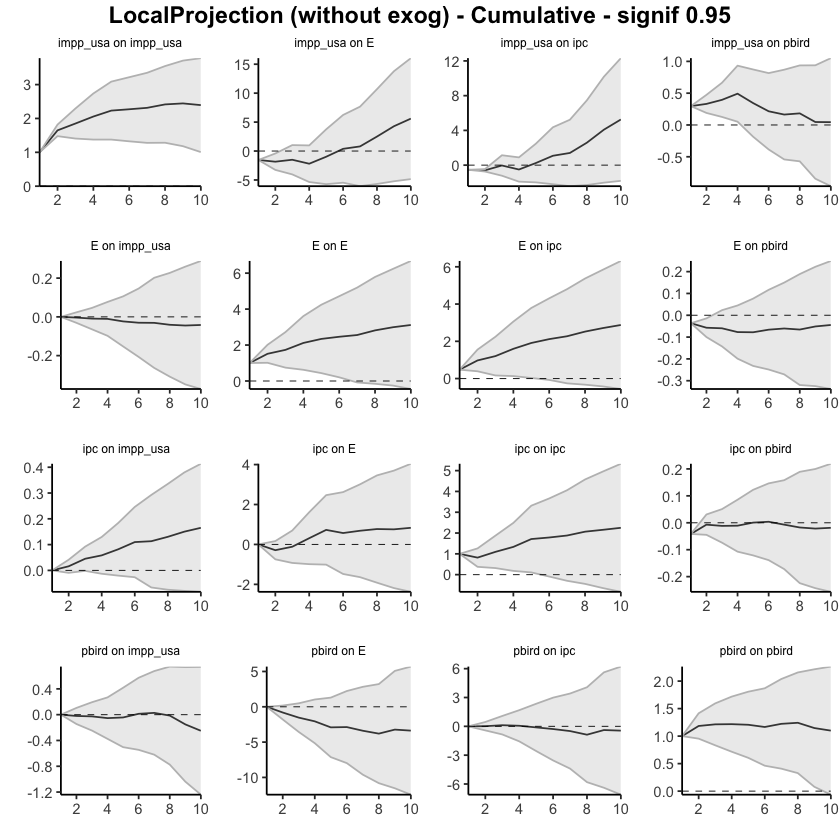

In [9]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), max_lags = 3, horizons=10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.29447045 -0.71692649 0.1279856  
25 ipc     E         3       0.19303126 -0.17690995 0.5629725  
26 ipc     E         4       0.25133912 -0.19525467 0.6979329  
27 ipc     E         5       0.40455792  0.03727786 0.7718380  
28 ipc     E         6      -0.14509936 -0.40086101 0.1106623  
29 ipc     E         7       0.30806965  0.02867855 0.5874607  
30 ipc     E         8       0.07694533 -0.27020201 0.4240927  
31 ipc     E         9      -0.01290305 -0.26415417 0.2383481  
32 ipc     E        10       0.06922283 -0.18439132 0.3228370  
33 ipc     E        11       0.08104631 -0.20746715 0.3695598

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.80951912 -1.9140029  0.2949647  
47 pbird   E         3      -0.42809893 -1.3471520  0.4909541  
48 pbird   E         4      -0.42325550 -1.4798348  0.6333238  
49 pbird   E         5      -0.79602646 -2.0098075  0.4177546  
50 pbird   E         6       0.23834949 -0.7058497  1.1825487  
51 pbird   E         7      -0.44972779 -1.4107937  0.5113381  
52 pbird   E         8      -0.34262601 -1.0625347  0.3772827  
53 pbird   E         9       0.62025314 -0.7043343  1.9448406  
54 pbird   E        10      -0.07031067 -0.8052879  0.6646666  
55 pbird   E        11      -0.26822360 -1.0854928  0.5490456

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4833011  0.48330114 0.4833011  
2  E       ipc       2      0.5259241 -0.20475048 1.2565988  
3  E       ipc       3      0.2342235 -0.20244367 0.6708906  
4  E       ipc       4      0.3921556  0.01336988 0.7709413  
5  E       ipc       5      0.3149398 -0.03092220 0.6608018  
6  E       ipc       6      0.2154872 -0.07430252 0.5052769  
7  E       ipc       7      0.1564473 -0.13368118 0.4465757  
8  E       ipc       8      0.2466084 -0.03115050 0.5243673  
9  E       ipc       9      0.1852541 -0.07601581 0.4465241  
10 E       ipc      10      0.1616061 -0.13183631 0.4550485  
11 E       ipc      11      0.1657239 -0.16699280 0.4984405

impulse response horizon irf_value    lower_bound upper_bound
56 pbird   ipc       1       0.000000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.041617941 -0.4202037  0.5034396  
58 pbird   ipc       3       0.103319002 -0.4621520  0.6687900  
59 pbird   ipc       4      -0.057633575 -0.8202197  0.7049526  
60 pbird   ipc       5      -0.122509256 -0.9968691  0.7518506  
61 pbird   ipc       6      -0.024250559 -0.7979084  0.7494073  
62 pbird   ipc       7      -0.211051205 -0.8473809  0.4252785  
63 pbird   ipc       8      -0.312180151 -1.2759751  0.6516148  
64 pbird   ipc       9       0.527592334 -0.5503924  1.6055771  
65 pbird   ipc      10      -0.006573588 -0.6503131  0.6371659  
66 pbird   ipc      11      -0.218381983 -0.7411610  0.3043970

impulse response horizon irf_value     lower_bound  upper_bound
12 E       pbird     1      -0.0425212925 -0.042521293 -0.04252129
13 E       pbird     2      -0.0241396780 -0.059198178  0.01091882
14 E       pbird     3      -0.0044844519 -0.055058913  0.04609001
15 E       pbird     4      -0.0138856519 -0.047140586  0.01936928
16 E       pbird     5      -0.0003299863 -0.031695694  0.03103572
17 E       pbird     6       0.0121282844 -0.010522179  0.03477875
18 E       pbird     7       0.0052904570 -0.020129838  0.03071075
19 E       pbird     8      -0.0050619991 -0.050218327  0.04009433
20 E       pbird     9       0.0140423729 -0.004780528  0.03286527
21 E       pbird    10       0.0069228410 -0.012694429  0.02654011
22 E       pbird    11       0.0019920328 -0.027793064  0.03177713

impulse response horizon irf_value    lower_bound  upper_bound
34 ipc     pbird     1      -0.033924961 -0.033924961 -0.03392496
35 ipc     pbird     2       0.024582322 -0.002890616  0.05205526
36 ipc     pbird     3      -0.006307327 -0.040497788  0.02788313
37 ipc     pbird     4       0.014480900 -0.011489908  0.04045171
38 ipc     pbird     5       0.011779853 -0.013733197  0.03729290
39 ipc     pbird     6       0.002836468 -0.014712052  0.02038499
40 ipc     pbird     7      -0.010084069 -0.031193873  0.01102573
41 ipc     pbird     8      -0.010360409 -0.053802386  0.03308157
42 ipc     pbird     9      -0.005357519 -0.021658877  0.01094384
43 ipc     pbird    10       0.002404568 -0.015211533  0.02002067
44 ipc     pbird    11      -0.001454701 -0.020700233  0.01779083

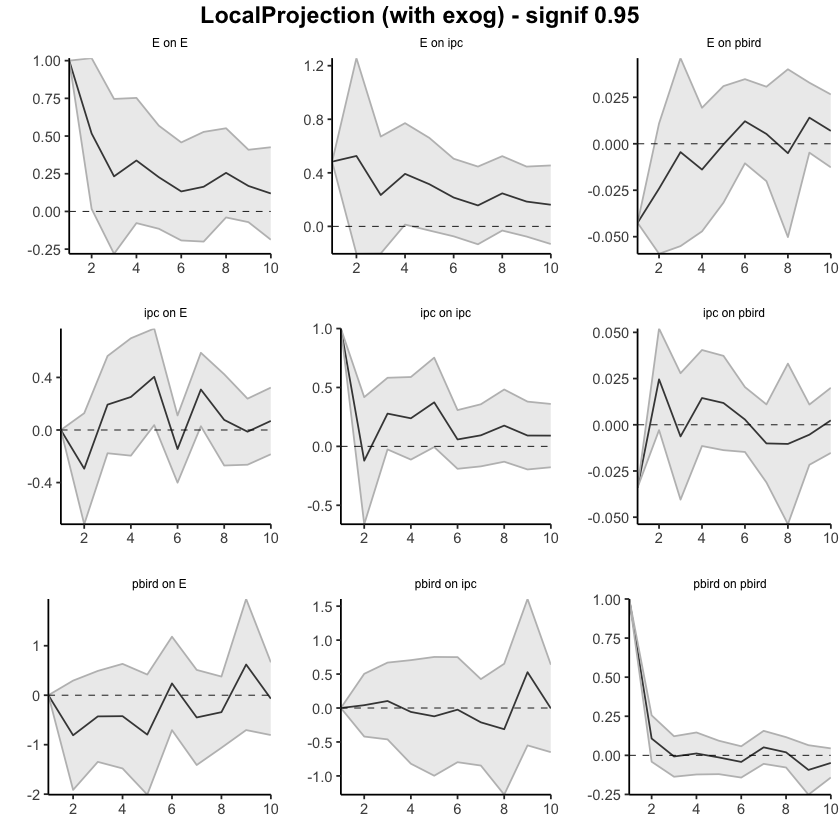

In [10]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 2, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value  lower_bound upper_bound
23 ipc     E         1       0.0000000  0.0000000  0.0000000  
24 ipc     E         2      -0.2944704 -0.7169265  0.1279856  
25 ipc     E         3      -0.1014392 -0.8938364  0.6909581  
26 ipc     E         4       0.1498999 -1.0890911  1.3888910  
27 ipc     E         5       0.5544579 -1.0518133  2.1607290  
28 ipc     E         6       0.4093585 -1.4526743  2.2713913  
29 ipc     E         7       0.7174281 -1.4239957  2.8588520  
30 ipc     E         8       0.7943735 -1.6941977  3.2829447  
31 ipc     E         9       0.7814704 -1.9583519  3.5212928  
32 ipc     E        10       0.8506933 -2.1427432  3.8441298  
33 ipc     E        11       0.9317396 -2.3502104  4.2136895

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.8095191  -1.914003  0.2949647  
47 pbird   E         3      -1.2376181  -3.261155  0.7859188  
48 pbird   E         4      -1.6608736  -4.740990  1.4192426  
49 pbird   E         5      -2.4569000  -6.750797  1.8369972  
50 pbird   E         6      -2.2185505  -7.456647  3.0195459  
51 pbird   E         7      -2.6682783  -8.867441  3.5308840  
52 pbird   E         8      -3.0109043  -9.929975  3.9081667  
53 pbird   E         9      -2.3906512 -10.634310  5.8530073  
54 pbird   E        10      -2.4609619 -11.439598  6.5176739  
55 pbird   E        11      -2.7291855 -12.525090  7.0667194

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4833011  0.48330114 0.4833011  
2  E       ipc       2      1.0092253  0.27855066 1.7398999  
3  E       ipc       3      1.2434488  0.07610699 2.4107905  
4  E       ipc       4      1.6356043  0.08947687 3.1817318  
5  E       ipc       5      1.9505442  0.05855467 3.8425336  
6  E       ipc       6      2.1660313 -0.01574785 4.3478105  
7  E       ipc       7      2.3224786 -0.14942903 4.7943862  
8  E       ipc       8      2.5690870 -0.18057953 5.3187535  
9  E       ipc       9      2.7543411 -0.25659534 5.7652775  
10 E       ipc      10      2.9159472 -0.38843164 6.2203260  
11 E       ipc      11      3.0816711 -0.55542445 6.7187666

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.04161794 -0.4202037  0.5034396  
58 pbird   ipc       3       0.14493694 -0.8823556  1.1722295  
59 pbird   ipc       4       0.08730337 -1.7025753  1.8771821  
60 pbird   ipc       5      -0.03520589 -2.6994444  2.6290327  
61 pbird   ipc       6      -0.05945645 -3.4973529  3.3784400  
62 pbird   ipc       7      -0.27050765 -4.3447338  3.8037185  
63 pbird   ipc       8      -0.58268780 -5.6207089  4.4553333  
64 pbird   ipc       9      -0.05509547 -6.1711013  6.0609104  
65 pbird   ipc      10      -0.06166906 -6.8214144  6.6980763  
66 pbird   ipc      11      -0.28005104 -7.5625754  7.0024734

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04252129 -0.04252129 -0.04252129
13 E       pbird     2      -0.06666097 -0.10171947 -0.03160247
14 E       pbird     3      -0.07114542 -0.15677838  0.01448754
15 E       pbird     4      -0.08503107 -0.20391897  0.03385682
16 E       pbird     5      -0.08536106 -0.23561466  0.06489254
17 E       pbird     6      -0.07323278 -0.24613684  0.09967129
18 E       pbird     7      -0.06794232 -0.26626668  0.13038204
19 E       pbird     8      -0.07300432 -0.31648501  0.17047637
20 E       pbird     9      -0.05896195 -0.32126554  0.20334165
21 E       pbird    10      -0.05203910 -0.33395996  0.22988176
22 E       pbird    11      -0.05004707 -0.36175303  0.26165889

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.033924961 -0.03392496 -0.03392496
35 ipc     pbird     2      -0.009342639 -0.03681558  0.01813030
36 ipc     pbird     3      -0.015649966 -0.07731336  0.04601343
37 ipc     pbird     4      -0.001169066 -0.08880327  0.08646514
38 ipc     pbird     5       0.010610787 -0.10253647  0.12375804
39 ipc     pbird     6       0.013447255 -0.11724852  0.14414303
40 ipc     pbird     7       0.003363186 -0.14844239  0.15516876
41 ipc     pbird     8      -0.006997223 -0.20224478  0.18825033
42 ipc     pbird     9      -0.012354743 -0.22390366  0.19919417
43 ipc     pbird    10      -0.009950175 -0.23911519  0.21921484
44 ipc     pbird    11      -0.011404876 -0.25981542  0.23700567

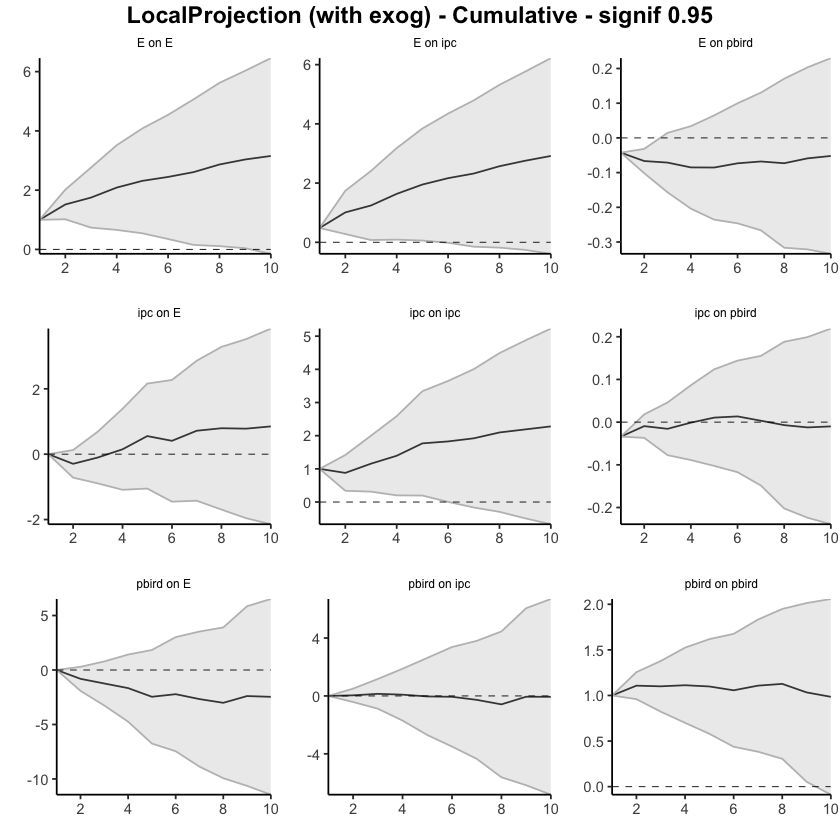

In [11]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound  upper_bound
23 ipc     E         1       0.00000000  0.000000000 0.00000000 
24 ipc     E         2      -0.34366407 -0.699869887 0.01254174 
25 ipc     E         3       0.26903973 -0.005000564 0.54308003 
26 ipc     E         4       0.44121594  0.134224124 0.74820775 
27 ipc     E         5       0.42115266  0.068737908 0.77356742 
28 ipc     E         6      -0.12718398 -0.379517124 0.12514915 
29 ipc     E         7       0.31582753  0.033277628 0.59837744 
30 ipc     E         8       0.08433160 -0.261952038 0.43061523 
31 ipc     E         9      -0.02465616 -0.277001513 0.22768918 
32 ipc     E        10       0.06656944 -0.191422369 0.32456124 
33 ipc     E        11       0.08905347 -0.197194058 0.37530099

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.0000000  0.0000000  
46 pbird   E         2      -0.5833729 -1.6789268  0.5121810  
47 pbird   E         3      -0.4618414 -1.5888959  0.6652131  
48 pbird   E         4      -0.2809162 -1.3965137  0.8346813  
49 pbird   E         5      -0.7447322 -1.9694965  0.4800320  
50 pbird   E         6       0.2858664 -0.7115003  1.2832332  
51 pbird   E         7      -0.4685155 -1.5196218  0.5825908  
52 pbird   E         8      -0.2985834 -1.1123669  0.5152000  
53 pbird   E         9       0.6347793 -0.6119214  1.8814800  
54 pbird   E        10      -0.3212317 -1.1171755  0.4747122  
55 pbird   E        11      -0.5517171 -1.4119184  0.3084843

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4807455  0.480745463 0.4807455  
2  E       ipc       2      0.5085282 -0.143983015 1.1610395  
3  E       ipc       3      0.2298242 -0.152334469 0.6119829  
4  E       ipc       4      0.3803629 -0.008009885 0.7687358  
5  E       ipc       5      0.2978080 -0.019605051 0.6152211  
6  E       ipc       6      0.2086210 -0.043099615 0.4603416  
7  E       ipc       7      0.1438155 -0.169248866 0.4568799  
8  E       ipc       8      0.2344838 -0.051505569 0.5204733  
9  E       ipc       9      0.1830039 -0.086771191 0.4527790  
10 E       ipc      10      0.1620181 -0.128141613 0.4521779  
11 E       ipc      11      0.1651174 -0.164444579 0.4946794

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.22045289 -0.1782474  0.6191532  
58 pbird   ipc       3       0.08993945 -0.5658076  0.7456865  
59 pbird   ipc       4      -0.03165888 -0.9162525  0.8529347  
60 pbird   ipc       5      -0.05333804 -0.9390975  0.8324215  
61 pbird   ipc       6       0.03624814 -0.7923983  0.8648946  
62 pbird   ipc       7      -0.24997476 -0.9067914  0.4068418  
63 pbird   ipc       8      -0.29636462 -1.3493630  0.7566338  
64 pbird   ipc       9       0.56631751 -0.5067709  1.6394059  
65 pbird   ipc      10      -0.08537895 -0.7437687  0.5730108  
66 pbird   ipc      11      -0.29794383 -0.8887988  0.2929112

impulse response horizon irf_value    lower_bound  upper_bound
12 E       pbird     1      -0.039360611 -0.039360611 -0.03936061
13 E       pbird     2      -0.021509864 -0.060136908  0.01711718
14 E       pbird     3      -0.003657856 -0.045286245  0.03797053
15 E       pbird     4      -0.013290539 -0.047297062  0.02071598
16 E       pbird     5       0.002858789 -0.027277044  0.03299462
17 E       pbird     6       0.011580924 -0.009571695  0.03273354
18 E       pbird     7       0.005056880 -0.020366294  0.03048005
19 E       pbird     8       0.001630808 -0.042079787  0.04534140
20 E       pbird     9       0.011861575 -0.003716846  0.02743999
21 E       pbird    10       0.004532466 -0.019090026  0.02815496
22 E       pbird    11       0.001682041 -0.032998588  0.03636267

impulse response horizon irf_value    lower_bound  upper_bound 
34 ipc     pbird     1      -0.038953005 -0.038953005 -0.038953005
35 ipc     pbird     2       0.020016304 -0.008860305  0.048892913
36 ipc     pbird     3      -0.007464400 -0.034235072  0.019306271
37 ipc     pbird     4       0.014904057 -0.010123515  0.039931630
38 ipc     pbird     5       0.011167763 -0.013316630  0.035652156
39 ipc     pbird     6       0.002466231 -0.012501431  0.017433892
40 ipc     pbird     7      -0.010404524 -0.031965743  0.011156694
41 ipc     pbird     8       0.002893240 -0.033302321  0.039088800
42 ipc     pbird     9      -0.004757347 -0.017662327  0.008147632
43 ipc     pbird    10       0.005103395 -0.013493320  0.023700110
44 ipc     pbird    11      -0.004573979 -0.025969565  0.016821607

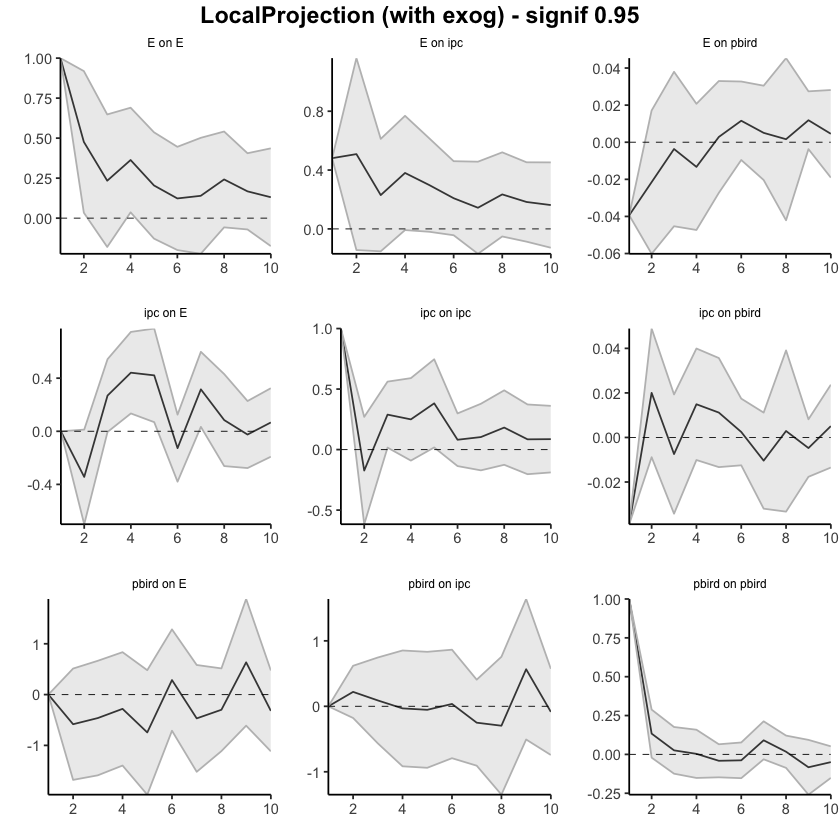

In [12]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 5, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.00000000 
24 ipc     E         2      -0.34366407 -0.6998699  0.01254174 
25 ipc     E         3      -0.07462434 -0.7048705  0.55562177 
26 ipc     E         4       0.36659159 -0.5706463  1.30382951 
27 ipc     E         5       0.78774426 -0.5019084  2.07739694 
28 ipc     E         6       0.66056027 -0.8814255  2.20254609 
29 ipc     E         7       0.97638781 -0.8481479  2.80092353 
30 ipc     E         8       1.06071940 -1.1101000  3.23153876 
31 ipc     E         9       1.03606324 -1.3871015  3.45922794 
32 ipc     E        10       1.10263268 -1.5785238  3.78378919 
33 ipc     E        11       1.19168614 -1.7757179  4.15909018

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.000000   
46 pbird   E         2      -0.5833729  -1.678927  0.512181   
47 pbird   E         3      -1.0452143  -3.267823  1.177394   
48 pbird   E         4      -1.3261305  -4.664336  2.012075   
49 pbird   E         5      -2.0708627  -6.633833  2.492107   
50 pbird   E         6      -1.7849963  -7.345333  3.775341   
51 pbird   E         7      -2.2535118  -8.864955  4.357931   
52 pbird   E         8      -2.5520952  -9.977322  4.873131   
53 pbird   E         9      -1.9173159 -10.589243  6.754611   
54 pbird   E        10      -2.2385476 -11.706419  7.229324   
55 pbird   E        11      -2.7902647 -13.118337  7.537808

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4807455  0.48074546 0.4807455  
2  E       ipc       2      0.9892737  0.33676245 1.6417849  
3  E       ipc       3      1.2190979  0.18442798 2.2537679  
4  E       ipc       4      1.5994609  0.17641809 3.0225036  
5  E       ipc       5      1.8972689  0.15681304 3.6377247  
6  E       ipc       6      2.1058899  0.11371343 4.0980664  
7  E       ipc       7      2.2497054 -0.05553544 4.5549463  
8  E       ipc       8      2.4841893 -0.10704101 5.0754196  
9  E       ipc       9      2.6671932 -0.19381220 5.5281986  
10 E       ipc      10      2.8292113 -0.32195381 5.9803765  
11 E       ipc      11      2.9943287 -0.48639839 6.4750559

impulse response horizon irf_value  lower_bound upper_bound
56 pbird   ipc       1       0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.2204529 -0.1782474  0.6191532  
58 pbird   ipc       3       0.3103923 -0.7440551  1.3648398  
59 pbird   ipc       4       0.2787335 -1.6603075  2.2177745  
60 pbird   ipc       5       0.2253954 -2.5994051  3.0501959  
61 pbird   ipc       6       0.2616436 -3.3918034  3.9150905  
62 pbird   ipc       7       0.0116688 -4.2985947  4.3219323  
63 pbird   ipc       8      -0.2846958 -5.6479578  5.0785661  
64 pbird   ipc       9       0.2816217 -6.1547287  6.7179721  
65 pbird   ipc      10       0.1962427 -6.8984974  7.2909829  
66 pbird   ipc      11      -0.1017011 -7.7872962  7.5838940

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.03936061 -0.03936061 -0.03936061
13 E       pbird     2      -0.06087047 -0.09949752 -0.02224343
14 E       pbird     3      -0.06452833 -0.14478376  0.01572710
15 E       pbird     4      -0.07781887 -0.19208083  0.03644309
16 E       pbird     5      -0.07496008 -0.21935787  0.06943771
17 E       pbird     6      -0.06337916 -0.22892957  0.10217125
18 E       pbird     7      -0.05832228 -0.24929586  0.13265131
19 E       pbird     8      -0.05669147 -0.29137565  0.17799271
20 E       pbird     9      -0.04482989 -0.29509249  0.20543271
21 E       pbird    10      -0.04029743 -0.31418252  0.23358766
22 E       pbird    11      -0.03861539 -0.34718111  0.26995033

impulse response horizon irf_value     lower_bound upper_bound 
34 ipc     pbird     1      -0.0389530052 -0.03895301 -0.038953005
35 ipc     pbird     2      -0.0189367013 -0.04781331  0.009939908
36 ipc     pbird     3      -0.0264011016 -0.08204838  0.029246179
37 ipc     pbird     4      -0.0114970445 -0.09217190  0.069177809
38 ipc     pbird     5      -0.0003292817 -0.10548853  0.104829964
39 ipc     pbird     6       0.0021369491 -0.11798996  0.122263857
40 ipc     pbird     7      -0.0082675750 -0.14995570  0.133420551
41 ipc     pbird     8      -0.0053743350 -0.18325802  0.172509352
42 ipc     pbird     9      -0.0101316821 -0.20092035  0.180656984
43 ipc     pbird    10      -0.0050282874 -0.21441367  0.204357094
44 ipc     pbird    11      -0.0096022665 -0.24038323  0.221178700

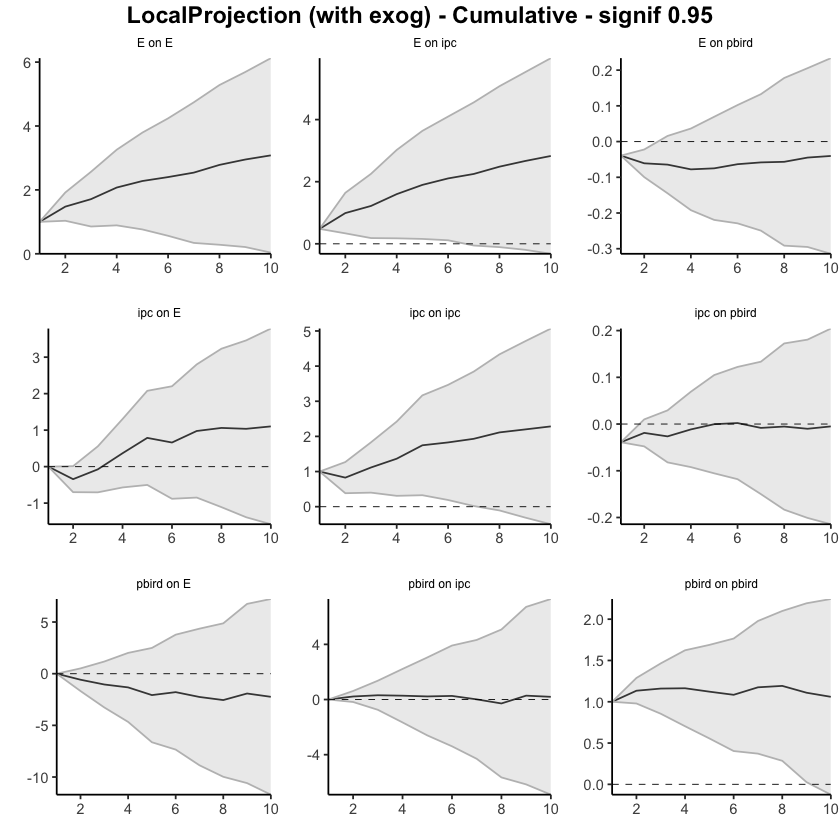

In [13]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   1   1   1   1   1   
2 ipc      3   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   1   1   1   1   1   
2 ipc      3   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   1   1   1   1   1   
2 ipc      3   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.28889142 -0.7040596  0.1262767  
25 ipc     E         3      -0.09200295 -0.8285869  0.6445810  
26 ipc     E         4       0.33369265 -0.7339396  1.4013249  
27 ipc     E         5       0.74755771 -0.6878984  2.1830138  
28 ipc     E         6       0.60202212 -1.0879196  2.2919639  
29 ipc     E         7       0.91277001 -1.0497184  2.8752585  
30 ipc     E         8       0.99258290 -1.3246255  3.3097913  
31 ipc     E         9       0.96791629 -1.6093173  3.5451499  
32 ipc     E        10       1.03645962 -1.8050372  3.8779565  
33 ipc     E        11       1.12457376 -2.0116419  4.2607894

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.9289389  -2.076702  0.2188241  
47 pbird   E         3      -1.6090389  -3.808259  0.5901808  
48 pbird   E         4      -2.1346562  -5.487280  1.2179676  
49 pbird   E         5      -3.1149224  -7.770699  1.5408544  
50 pbird   E         6      -3.0684855  -8.695027  2.5580555  
51 pbird   E         7      -3.7221306 -10.476015  3.0317538  
52 pbird   E         8      -4.2033153 -11.767019  3.3603883  
53 pbird   E         9      -3.7131211 -12.596314  5.1700713  
54 pbird   E        10      -3.9385325 -13.625067  5.7480021  
55 pbird   E        11      -4.3170548 -14.805700  6.1715900

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4835171  0.48351715 0.4835171  
2  E       ipc       2      0.9777484  0.31196147 1.6435353  
3  E       ipc       3      1.2147087  0.14506033 2.2843571  
4  E       ipc       4      1.6070972  0.15389153 3.0603029  
5  E       ipc       5      1.9211826  0.11884215 3.7235230  
6  E       ipc       6      2.1407818  0.07329555 4.2082681  
7  E       ipc       7      2.2996741 -0.05346566 4.6528139  
8  E       ipc       8      2.5456786 -0.08297634 5.1743335  
9  E       ipc       9      2.7326108 -0.15659313 5.6218147  
10 E       ipc      10      2.8947578 -0.28225865 6.0717742  
11 E       ipc      11      3.0594606 -0.44867391 6.5675950

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.01512334 -0.4089016  0.4391482  
58 pbird   ipc       3      -0.01215883 -1.0710475  1.0467298  
59 pbird   ipc       4      -0.18251212 -2.0734857  1.7084614  
60 pbird   ipc       5      -0.41967716 -3.2275292  2.3881749  
61 pbird   ipc       6      -0.58390631 -4.2624879  3.0946753  
62 pbird   ipc       7      -0.97784388 -5.3740736  3.4183859  
63 pbird   ipc       8      -1.40585458 -6.8718483  4.0601392  
64 pbird   ipc       9      -0.96532457 -7.5221007  5.5914515  
65 pbird   ipc      10      -1.08623272 -8.3338649  6.1613995  
66 pbird   ipc      11      -1.39742871 -9.2149925  6.4201351

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04137517 -0.04137517 -0.04137517
13 E       pbird     2      -0.06462527 -0.10134306 -0.02790749
14 E       pbird     3      -0.06887433 -0.14889844  0.01114978
15 E       pbird     4      -0.08282130 -0.19655939  0.03091679
16 E       pbird     5      -0.08308664 -0.22872647  0.06255318
17 E       pbird     6      -0.07084764 -0.23783507  0.09613979
18 E       pbird     7      -0.06535680 -0.25954351  0.12882992
19 E       pbird     8      -0.06289991 -0.30131544  0.17551561
20 E       pbird     9      -0.04889517 -0.30639713  0.20860679
21 E       pbird    10      -0.04231841 -0.31910637  0.23446956
22 E       pbird    11      -0.03984830 -0.35126936  0.27157277

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.037861374 -0.03786137 -0.03786137
35 ipc     pbird     2      -0.017273596 -0.04627349  0.01172630
36 ipc     pbird     3      -0.024451930 -0.08122991  0.03232605
37 ipc     pbird     4      -0.009553857 -0.09158279  0.07247508
38 ipc     pbird     5       0.001911630 -0.10537645  0.10919971
39 ipc     pbird     6       0.004202740 -0.11952112  0.12792660
40 ipc     pbird     7      -0.006622178 -0.15260232  0.13935796
41 ipc     pbird     8      -0.003938733 -0.18689511  0.17901764
42 ipc     pbird     9      -0.009286845 -0.20761065  0.18903696
43 ipc     pbird    10      -0.005288810 -0.22060362  0.21002600
44 ipc     pbird    11      -0.009460887 -0.24589754  0.22697577

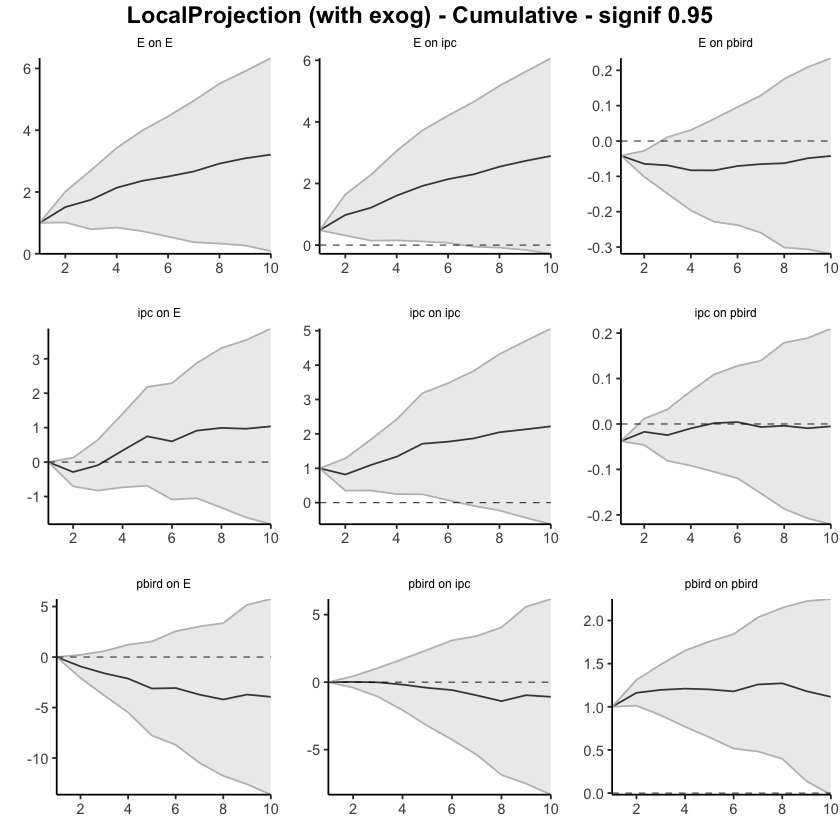

In [14]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.25188704 -0.62926517 0.1254911  
25 ipc     E         3       0.23119468 -0.14273680 0.6051262  
26 ipc     E         4       0.27985332 -0.18669638 0.7464030  
27 ipc     E         5       0.42606019  0.05789973 0.7942207  
28 ipc     E         6      -0.07579692 -0.32493658 0.1733427  
29 ipc     E         7       0.34429760  0.08089964 0.6076955  
30 ipc     E         8       0.11531193 -0.27074976 0.5013736  
31 ipc     E         9       0.01884068 -0.26006878 0.2977501  
32 ipc     E        10       0.09866960 -0.20185046 0.3991897  
33 ipc     E        11       0.12852444 -0.21929769 0.4763466

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.63941803 -1.7256291  0.4467930  
47 pbird   E         3      -0.29124573 -1.1496403  0.5671489  
48 pbird   E         4      -0.47381237 -1.5688409  0.6212162  
49 pbird   E         5      -0.57126051 -1.6964090  0.5538880  
50 pbird   E         6       0.49840543 -0.4306324  1.4274432  
51 pbird   E         7      -0.29467519 -1.4125745  0.8232242  
52 pbird   E         8      -0.05766449 -0.8463116  0.7309826  
53 pbird   E         9       0.88586019 -0.4549594  2.2266797  
54 pbird   E        10       0.11634951 -0.5496046  0.7823036  
55 pbird   E        11       0.04229928 -0.6849804  0.7695789

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4885767  0.488576659 0.4885767  
2  E       ipc       2      0.5104564 -0.178458558 1.1993713  
3  E       ipc       3      0.2165759 -0.249419390 0.6825711  
4  E       ipc       4      0.4045901  0.006165717 0.8030145  
5  E       ipc       5      0.3151025 -0.029241690 0.6594467  
6  E       ipc       6      0.2181493 -0.057430124 0.4937286  
7  E       ipc       7      0.2216403 -0.092851513 0.5361322  
8  E       ipc       8      0.2405550 -0.054516022 0.5356261  
9  E       ipc       9      0.1706627 -0.105960207 0.4472856  
10 E       ipc      10      0.1565183 -0.148379735 0.4614164  
11 E       ipc      11      0.1482757 -0.185139915 0.4816913

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.21740320 -0.1680942  0.6029006  
58 pbird   ipc       3       0.28421618 -0.1643919  0.7328243  
59 pbird   ipc       4      -0.04152626 -0.7763350  0.6932825  
60 pbird   ipc       5       0.03158085 -0.7369050  0.8000667  
61 pbird   ipc       6       0.12448476 -0.5241482  0.7731177  
62 pbird   ipc       7      -0.01045665 -0.5652670  0.5443537  
63 pbird   ipc       8      -0.09677702 -1.0966123  0.9030583  
64 pbird   ipc       9       0.77016635 -0.3084760  1.8488087  
65 pbird   ipc      10       0.18441272 -0.4516098  0.8204353  
66 pbird   ipc      11       0.01439485 -0.5297348  0.5585245

impulse response horizon irf_value    lower_bound  upper_bound
12 E       pbird     1      -0.041735702 -0.041735702 -0.04173570
13 E       pbird     2      -0.021486502 -0.056125629  0.01315263
14 E       pbird     3      -0.003911624 -0.051521306  0.04369806
15 E       pbird     4      -0.014130395 -0.056920784  0.02865999
16 E       pbird     5       0.001662552 -0.032016120  0.03534122
17 E       pbird     6       0.011483109 -0.013155558  0.03612178
18 E       pbird     7       0.002718333 -0.022952945  0.02838961
19 E       pbird     8      -0.006669706 -0.050951703  0.03761229
20 E       pbird     9       0.016785648 -0.006169335  0.03974063
21 E       pbird    10       0.007384466 -0.013382736  0.02815167
22 E       pbird    11       0.004822935 -0.025040917  0.03468679

impulse response horizon irf_value    lower_bound  upper_bound
34 ipc     pbird     1      -0.030789160 -0.030789160 -0.03078916
35 ipc     pbird     2       0.023399631 -0.004023704  0.05082297
36 ipc     pbird     3      -0.007879759 -0.040294786  0.02453527
37 ipc     pbird     4       0.011830480 -0.019690828  0.04335179
38 ipc     pbird     5       0.007057520 -0.020653895  0.03476894
39 ipc     pbird     6       0.002298727 -0.016269649  0.02086710
40 ipc     pbird     7      -0.007903063 -0.029213838  0.01340771
41 ipc     pbird     8      -0.011394111 -0.053311436  0.03052321
42 ipc     pbird     9      -0.008451392 -0.027617518  0.01071473
43 ipc     pbird    10       0.003097432 -0.015006148  0.02120101
44 ipc     pbird    11      -0.004094036 -0.024642508  0.01645444

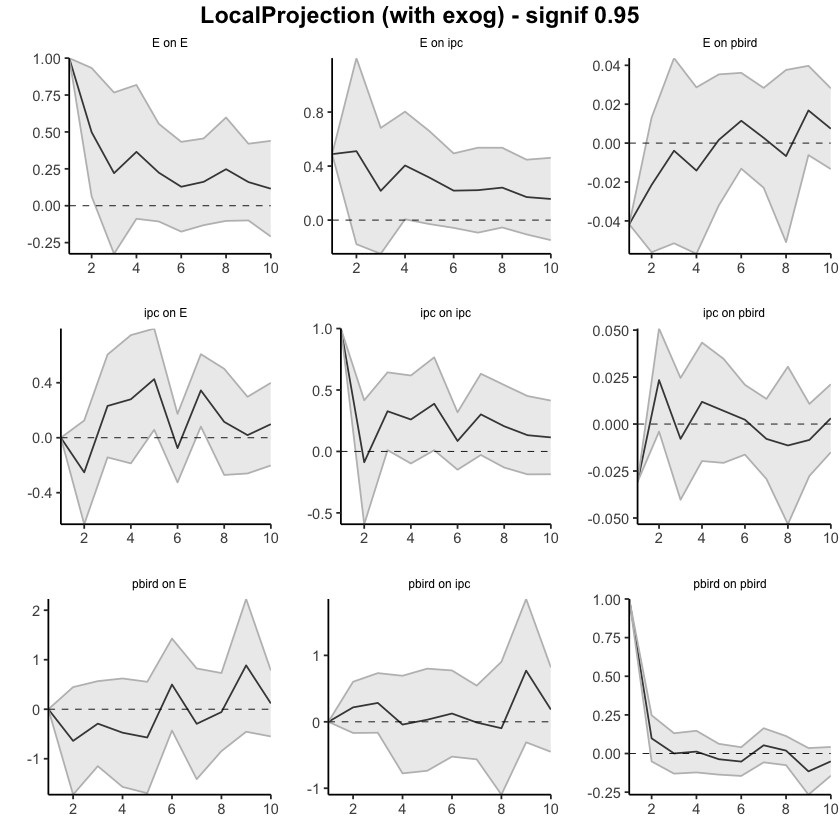

In [15]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 2, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.25188704 -0.6292652  0.1254911  
25 ipc     E         3      -0.02069236 -0.7720020  0.7306172  
26 ipc     E         4       0.25916096 -0.9586983  1.4770203  
27 ipc     E         5       0.68522115 -0.9007986  2.2712409  
28 ipc     E         6       0.60942423 -1.2257352  2.4445836  
29 ipc     E         7       0.95372182 -1.1448355  3.0522792  
30 ipc     E         8       1.06903376 -1.4155853  3.5536528  
31 ipc     E         9       1.08787444 -1.6756541  3.8514030  
32 ipc     E        10       1.18654404 -1.8775045  4.2505926  
33 ipc     E        11       1.31506847 -2.0968022  4.7269392

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.000000   
46 pbird   E         2      -0.6394180  -1.725629  0.446793   
47 pbird   E         3      -0.9306638  -2.875269  1.013942   
48 pbird   E         4      -1.4044761  -4.444110  1.635158   
49 pbird   E         5      -1.9757366  -6.140519  2.189046   
50 pbird   E         6      -1.4773312  -6.571152  3.616489   
51 pbird   E         7      -1.7720064  -7.983726  4.439713   
52 pbird   E         8      -1.8296709  -8.830038  5.170696   
53 pbird   E         9      -0.9438107  -9.284997  7.397376   
54 pbird   E        10      -0.8274612  -9.834602  8.179679   
55 pbird   E        11      -0.7851619 -10.519582  8.949258

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4885767  0.48857666 0.4885767  
2  E       ipc       2      0.9990330  0.31011810 1.6879479  
3  E       ipc       3      1.2156089  0.06069871 2.3705190  
4  E       ipc       4      1.6201990  0.06686443 3.1735335  
5  E       ipc       5      1.9353015  0.03762274 3.8329802  
6  E       ipc       6      2.1534507 -0.01980739 4.3267089  
7  E       ipc       7      2.3750911 -0.11265890 4.8628410  
8  E       ipc       8      2.6156461 -0.16717492 5.3984671  
9  E       ipc       9      2.7863088 -0.27313513 5.8457527  
10 E       ipc      10      2.9428271 -0.42151486 6.3071691  
11 E       ipc      11      3.0911028 -0.60665478 6.7888605

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.2174032 -0.1680942  0.6029006  
58 pbird   ipc       3      0.5016194 -0.3324861  1.3357248  
59 pbird   ipc       4      0.4600931 -1.1088211  2.0290074  
60 pbird   ipc       5      0.4916740 -1.8457261  2.8290741  
61 pbird   ipc       6      0.6161587 -2.3698743  3.6021918  
62 pbird   ipc       7      0.6057021 -2.9351413  4.1465455  
63 pbird   ipc       8      0.5089251 -4.0317536  5.0496038  
64 pbird   ipc       9      1.2790914 -4.3402296  6.8984124  
65 pbird   ipc      10      1.4635041 -4.7918394  7.7188477  
66 pbird   ipc      11      1.4778990 -5.3215742  8.2773722

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04173570 -0.04173570 -0.04173570
13 E       pbird     2      -0.06322220 -0.09786133 -0.02858308
14 E       pbird     3      -0.06713383 -0.14938264  0.01511498
15 E       pbird     4      -0.08126422 -0.20630342  0.04377498
16 E       pbird     5      -0.07960167 -0.23831954  0.07911620
17 E       pbird     6      -0.06811856 -0.25147510  0.11523798
18 E       pbird     7      -0.06540023 -0.27442804  0.14362759
19 E       pbird     8      -0.07206993 -0.32537975  0.18123988
20 E       pbird     9      -0.05528429 -0.33154908  0.22098051
21 E       pbird    10      -0.04789982 -0.34493182  0.24913218
22 E       pbird    11      -0.04307689 -0.36997273  0.28381896

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.030789160 -0.03078916 -0.03078916
35 ipc     pbird     2      -0.007389528 -0.03481286  0.02003381
36 ipc     pbird     3      -0.015269287 -0.07510765  0.04456908
37 ipc     pbird     4      -0.003438808 -0.09479848  0.08792086
38 ipc     pbird     5       0.003618713 -0.11545237  0.12268980
39 ipc     pbird     6       0.005917440 -0.13172202  0.14355690
40 ipc     pbird     7      -0.001985623 -0.16093586  0.15696461
41 ipc     pbird     8      -0.013379734 -0.21424729  0.18748783
42 ipc     pbird     9      -0.021831126 -0.24186481  0.19820256
43 ipc     pbird    10      -0.018733694 -0.25687096  0.21940357
44 ipc     pbird    11      -0.022827729 -0.28151347  0.23585801

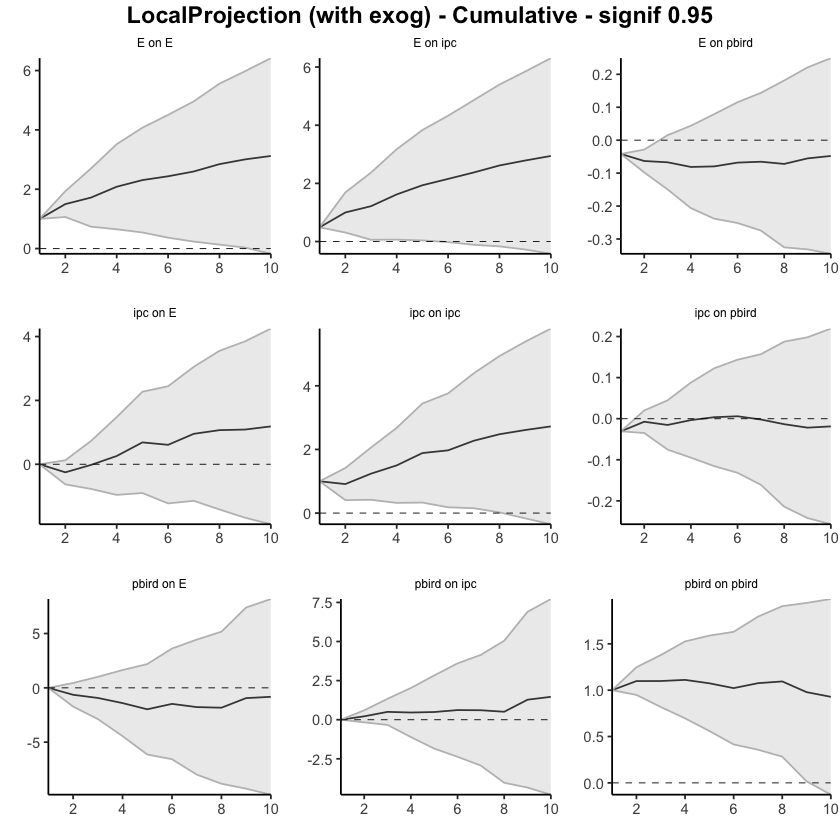

In [16]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000  0.00000000
24 ipc     E         2      -0.34577765 -0.65941694 -0.03213836
25 ipc     E         3       0.31921114  0.05037459  0.58804769
26 ipc     E         4       0.46162720  0.15687709  0.76637731
27 ipc     E         5       0.46842436  0.13785057  0.79899815
28 ipc     E         6      -0.06971676 -0.31086613  0.17143261
29 ipc     E         7       0.38154978  0.14277130  0.62032826
30 ipc     E         8       0.13341477 -0.23402125  0.50085079
31 ipc     E         9       0.01902544 -0.24340393  0.28145480
32 ipc     E        10       0.09894064 -0.19003015  0.38791142
33 ipc     E        11       0.13371721 -0.22066983  0.48810425

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.63693564 -1.8522383  0.5783671  
47 pbird   E         3      -0.51481461 -1.5475038  0.5178746  
48 pbird   E         4      -0.54274584 -1.7849831  0.6994915  
49 pbird   E         5      -0.82725207 -2.1372151  0.4827109  
50 pbird   E         6       0.35687957 -0.6383060  1.3520651  
51 pbird   E         7      -0.53224872 -1.7678799  0.7033824  
52 pbird   E         8      -0.17861623 -1.0089452  0.6517128  
53 pbird   E         9       0.92730021 -0.6642458  2.5188462  
54 pbird   E        10       0.04439058 -0.7801427  0.8689238  
55 pbird   E        11      -0.11920007 -0.8767233  0.6383231

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4734557  0.473455696 0.4734557  
2  E       ipc       2      0.4963650 -0.101240411 1.0939705  
3  E       ipc       3      0.1979388 -0.243008548 0.6388862  
4  E       ipc       4      0.3934841  0.046754669 0.7402136  
5  E       ipc       5      0.3181981  0.004368708 0.6320275  
6  E       ipc       6      0.2048002 -0.062159870 0.4717603  
7  E       ipc       7      0.1738628 -0.107584719 0.4553104  
8  E       ipc       8      0.2443849 -0.055210367 0.5439801  
9  E       ipc       9      0.1650654 -0.103620817 0.4337516  
10 E       ipc      10      0.1577544 -0.141710017 0.4572189  
11 E       ipc      11      0.1524550 -0.180973164 0.4858832

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.28422990 -0.1668563  0.7353161  
58 pbird   ipc       3       0.12012231 -0.3667490  0.6069936  
59 pbird   ipc       4      -0.21448324 -1.0939604  0.6649939  
60 pbird   ipc       5      -0.17000390 -1.0620455  0.7220377  
61 pbird   ipc       6      -0.02739286 -0.8358972  0.7811114  
62 pbird   ipc       7      -0.30261990 -1.0593431  0.4541034  
63 pbird   ipc       8      -0.25674337 -1.3828654  0.8693786  
64 pbird   ipc       9       0.78253598 -0.4693056  2.0343776  
65 pbird   ipc      10       0.16136416 -0.5720278  0.8947561  
66 pbird   ipc      11      -0.06354891 -0.6539360  0.5268382

impulse response horizon irf_value    lower_bound  upper_bound
12 E       pbird     1      -0.042721554 -0.042721554 -0.04272155
13 E       pbird     2      -0.019355484 -0.052568364  0.01385740
14 E       pbird     3      -0.001798555 -0.051714686  0.04811758
15 E       pbird     4      -0.014379866 -0.052018857  0.02325913
16 E       pbird     5       0.001340737 -0.029392255  0.03207373
17 E       pbird     6       0.012447326 -0.010197585  0.03509224
18 E       pbird     7       0.001639547 -0.021921395  0.02520049
19 E       pbird     8      -0.008829877 -0.054439069  0.03677931
20 E       pbird     9       0.018465459 -0.001953118  0.03888404
21 E       pbird    10       0.008447784 -0.012300620  0.02919619
22 E       pbird    11       0.002567215 -0.029702028  0.03483646

impulse response horizon irf_value     lower_bound  upper_bound
34 ipc     pbird     1      -0.0365608609 -0.036560861 -0.03656086
35 ipc     pbird     2       0.0178590767 -0.009905588  0.04562374
36 ipc     pbird     3      -0.0121418826 -0.044634220  0.02035045
37 ipc     pbird     4       0.0088845060 -0.018043560  0.03581257
38 ipc     pbird     5       0.0048684762 -0.019480770  0.02921772
39 ipc     pbird     6      -0.0003806273 -0.016746536  0.01598528
40 ipc     pbird     7      -0.0087538252 -0.027851191  0.01034354
41 ipc     pbird     8      -0.0146996648 -0.058901457  0.02950213
42 ipc     pbird     9      -0.0046849020 -0.021591793  0.01222199
43 ipc     pbird    10       0.0070090686 -0.011399376  0.02541751
44 ipc     pbird    11      -0.0033679982 -0.025079970  0.01834397

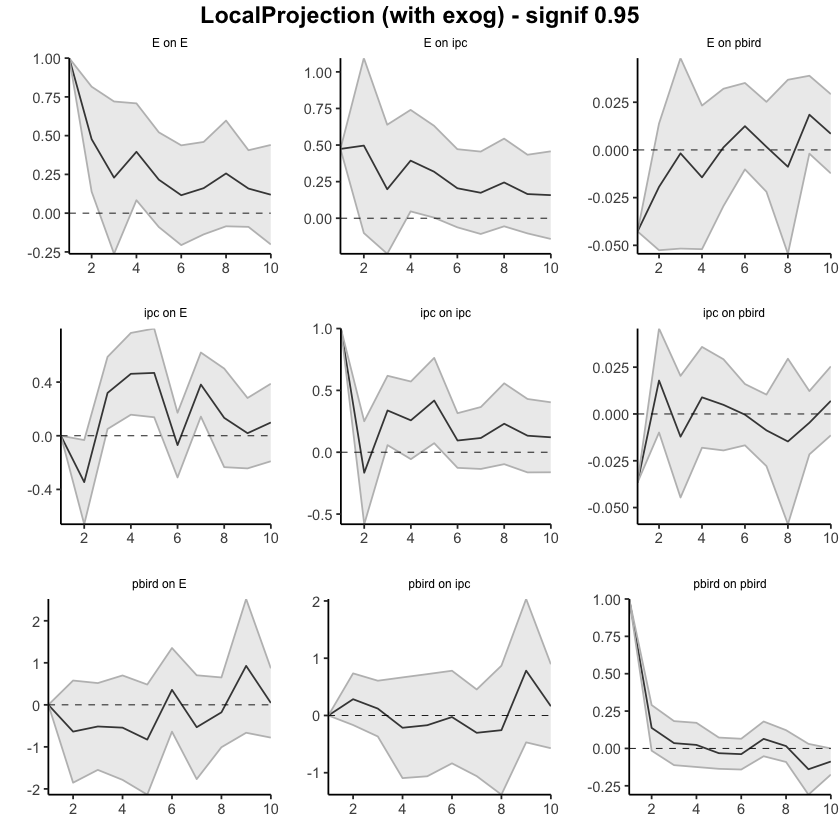

In [17]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 5, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.34577765 -0.6594169  -0.03213836
25 ipc     E         3      -0.02656651 -0.6090423   0.55590932
26 ipc     E         4       0.43506069 -0.4521653   1.32228664
27 ipc     E         5       0.90348505 -0.3143147   2.12128479
28 ipc     E         6       0.83376829 -0.6251808   2.29271740
29 ipc     E         7       1.21531807 -0.4824095   2.91304566
30 ipc     E         8       1.34873284 -0.7164308   3.41389645
31 ipc     E         9       1.36775828 -0.9598347   3.69535125
32 ipc     E        10       1.46669892 -1.1498648   4.08326268
33 ipc     E        11       1.60041613 -1.3705347   4.57136692

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.6369356  -1.852238  0.5783671  
47 pbird   E         3      -1.1517503  -3.399742  1.0962417  
48 pbird   E         4      -1.6944961  -5.184725  1.7957332  
49 pbird   E         5      -2.5217482  -7.321940  2.2784441  
50 pbird   E         6      -2.1648686  -7.960246  3.6305092  
51 pbird   E         7      -2.6971173  -9.728126  4.3338916  
52 pbird   E         8      -2.8757335 -10.737071  4.9856043  
53 pbird   E         9      -1.9484333 -11.401317  7.5044506  
54 pbird   E        10      -1.9040428 -12.181460  8.3733744  
55 pbird   E        11      -2.0232428 -13.058183  9.0116976

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4734557  0.47345570 0.4734557  
2  E       ipc       2      0.9698207  0.37221529 1.5674262  
3  E       ipc       3      1.1677595  0.12920674 2.2063124  
4  E       ipc       4      1.5612437  0.17596141 2.9465260  
5  E       ipc       5      1.8794418  0.18033011 3.5785535  
6  E       ipc       6      2.0842420  0.11817024 4.0503138  
7  E       ipc       7      2.2581049  0.01058553 4.5056242  
8  E       ipc       8      2.5024897 -0.04462484 5.0496043  
9  E       ipc       9      2.6675552 -0.14824566 5.4833560  
10 E       ipc      10      2.8253096 -0.28995568 5.9405749  
11 E       ipc      11      2.9777646 -0.47092884 6.4264581

impulse response horizon irf_value    lower_bound upper_bound
56 pbird   ipc       1       0.000000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.284229901 -0.1668563  0.7353161  
58 pbird   ipc       3       0.404352213 -0.5336053  1.3423097  
59 pbird   ipc       4       0.189868972 -1.6275657  2.0073037  
60 pbird   ipc       5       0.019865067 -2.6896112  2.7293414  
61 pbird   ipc       6      -0.007527791 -3.5255084  3.5104528  
62 pbird   ipc       7      -0.310147687 -4.5848515  3.9645562  
63 pbird   ipc       8      -0.566891053 -5.9677169  4.8339348  
64 pbird   ipc       9       0.215644927 -6.4370226  6.8683124  
65 pbird   ipc      10       0.377009084 -7.0090504  7.7630686  
66 pbird   ipc      11       0.313460169 -7.6629864  8.2899067

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04272155 -0.04272155 -0.04272155
13 E       pbird     2      -0.06207704 -0.09528992 -0.02886416
14 E       pbird     3      -0.06387559 -0.14700460  0.01925342
15 E       pbird     4      -0.07825546 -0.19902346  0.04251254
16 E       pbird     5      -0.07691472 -0.22841572  0.07458627
17 E       pbird     6      -0.06446740 -0.23861330  0.10967851
18 E       pbird     7      -0.06282785 -0.26053470  0.13487900
19 E       pbird     8      -0.07165773 -0.31497377  0.17165831
20 E       pbird     9      -0.05319227 -0.31692688  0.21054235
21 E       pbird    10      -0.04474448 -0.32922750  0.23973854
22 E       pbird    11      -0.04217727 -0.35892953  0.27457499

impulse response horizon irf_value   lower_bound upper_bound 
34 ipc     pbird     1      -0.03656086 -0.03656086 -0.036560861
35 ipc     pbird     2      -0.01870178 -0.04646645  0.009062881
36 ipc     pbird     3      -0.03084367 -0.09110067  0.029413335
37 ipc     pbird     4      -0.02195916 -0.10914423  0.065225908
38 ipc     pbird     5      -0.01709068 -0.12862500  0.094443630
39 ipc     pbird     6      -0.01747131 -0.14537154  0.110428912
40 ipc     pbird     7      -0.02622514 -0.17322273  0.120772452
41 ipc     pbird     8      -0.04092480 -0.23212418  0.150274580
42 ipc     pbird     9      -0.04560970 -0.25371598  0.162496569
43 ipc     pbird    10      -0.03860064 -0.26511535  0.187914083
44 ipc     pbird    11      -0.04196863 -0.29019532  0.206258057

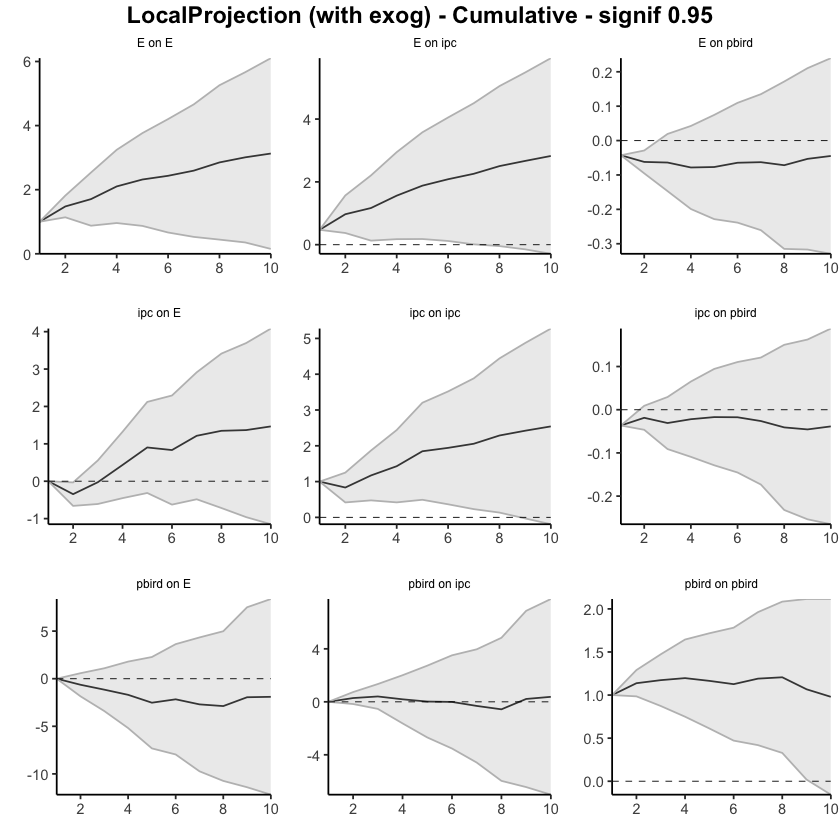

In [18]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.25721554 -0.63082901 0.1163979  
25 ipc     E         3       0.21659495 -0.13568918 0.5688791  
26 ipc     E         4       0.27253282 -0.18052468 0.7255903  
27 ipc     E         5       0.42920314  0.05540876 0.8029975  
28 ipc     E         6      -0.09401669 -0.33600641 0.1479730  
29 ipc     E         7       0.33075016  0.05614834 0.6053520  
30 ipc     E         8       0.12146292 -0.27920367 0.5221295  
31 ipc     E         9       0.02153763 -0.26635051 0.3094258  
32 ipc     E        10       0.10857344 -0.19949249 0.4166394  
33 ipc     E        11       0.15304713 -0.21121111 0.5173054

impulse response horizon irf_value    lower_bound upper_bound
45 pbird   E         1       0.000000000  0.0000000  0.0000000  
46 pbird   E         2      -0.657201374 -1.7498181  0.4354153  
47 pbird   E         3      -0.301512627 -1.1728359  0.5698107  
48 pbird   E         4      -0.438383010 -1.4927091  0.6159431  
49 pbird   E         5      -0.542593735 -1.6111268  0.5259393  
50 pbird   E         6       0.504063861 -0.3914993  1.3996270  
51 pbird   E         7      -0.278136259 -1.3277271  0.7714546  
52 pbird   E         8       0.004596225 -0.7123884  0.7215809  
53 pbird   E         9       0.926359277 -0.4445424  2.2972610  
54 pbird   E        10       0.154874397 -0.5465955  0.8563443  
55 pbird   E        11       0.078778052 -0.6284663  0.7860224

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4892780  0.489278040 0.4892780  
2  E       ipc       2      0.5103826 -0.178248723 1.1990139  
3  E       ipc       3      0.2237462 -0.242341475 0.6898340  
4  E       ipc       4      0.4059654  0.007580234 0.8043506  
5  E       ipc       5      0.3089686 -0.040079841 0.6580170  
6  E       ipc       6      0.2154585 -0.065569202 0.4964861  
7  E       ipc       7      0.2142960 -0.101505242 0.5300972  
8  E       ipc       8      0.2329146 -0.060190246 0.5260194  
9  E       ipc       9      0.1696459 -0.106602652 0.4458945  
10 E       ipc      10      0.1485317 -0.154734596 0.4517980  
11 E       ipc      11      0.1371516 -0.202922476 0.4772256

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.20591338 -0.1826160  0.5944427  
58 pbird   ipc       3       0.26143684 -0.1789162  0.7017898  
59 pbird   ipc       4      -0.01601344 -0.7283896  0.6963627  
60 pbird   ipc       5       0.06510832 -0.6824346  0.8126512  
61 pbird   ipc       6       0.17028560 -0.4482415  0.7888127  
62 pbird   ipc       7       0.03051515 -0.4987436  0.5597739  
63 pbird   ipc       8      -0.06293109 -0.9887846  0.8629224  
64 pbird   ipc       9       0.79764578 -0.3012343  1.8965259  
65 pbird   ipc      10       0.21037426 -0.4628566  0.8836051  
66 pbird   ipc      11       0.04590036 -0.5034621  0.5952629

impulse response horizon irf_value    lower_bound  upper_bound 
12 E       pbird     1      -0.041864270 -0.041864270 -0.041864270
13 E       pbird     2      -0.022293285 -0.053716286  0.009129716
14 E       pbird     3      -0.006078980 -0.054938838  0.042780879
15 E       pbird     4      -0.016182862 -0.055378436  0.023012713
16 E       pbird     5       0.001657336 -0.030370354  0.033685025
17 E       pbird     6       0.013238343 -0.009889907  0.036366593
18 E       pbird     7       0.004520618 -0.022026835  0.031068070
19 E       pbird     8      -0.005996074 -0.050260203  0.038268055
20 E       pbird     9       0.016662930 -0.004312108  0.037637967
21 E       pbird    10       0.007147729 -0.013820834  0.028116293
22 E       pbird    11       0.003431175 -0.027286395  0.034148745

impulse response horizon irf_value     lower_bound  upper_bound 
34 ipc     pbird     1      -0.0311802425 -0.031180243 -0.031180243
35 ipc     pbird     2       0.0237843031 -0.001338652  0.048907258
36 ipc     pbird     3      -0.0055594934 -0.038464489  0.027345503
37 ipc     pbird     4       0.0147776488 -0.014517218  0.044072515
38 ipc     pbird     5       0.0080525332 -0.018779832  0.034884898
39 ipc     pbird     6       0.0009313924 -0.017814463  0.019677248
40 ipc     pbird     7      -0.0096540043 -0.032237615  0.012929606
41 ipc     pbird     8      -0.0133833984 -0.055165257  0.028398460
42 ipc     pbird     9      -0.0081641891 -0.025597232  0.009268854
43 ipc     pbird    10       0.0024878437 -0.015545178  0.020520865
44 ipc     pbird    11      -0.0033449212 -0.023793024  0.017103182

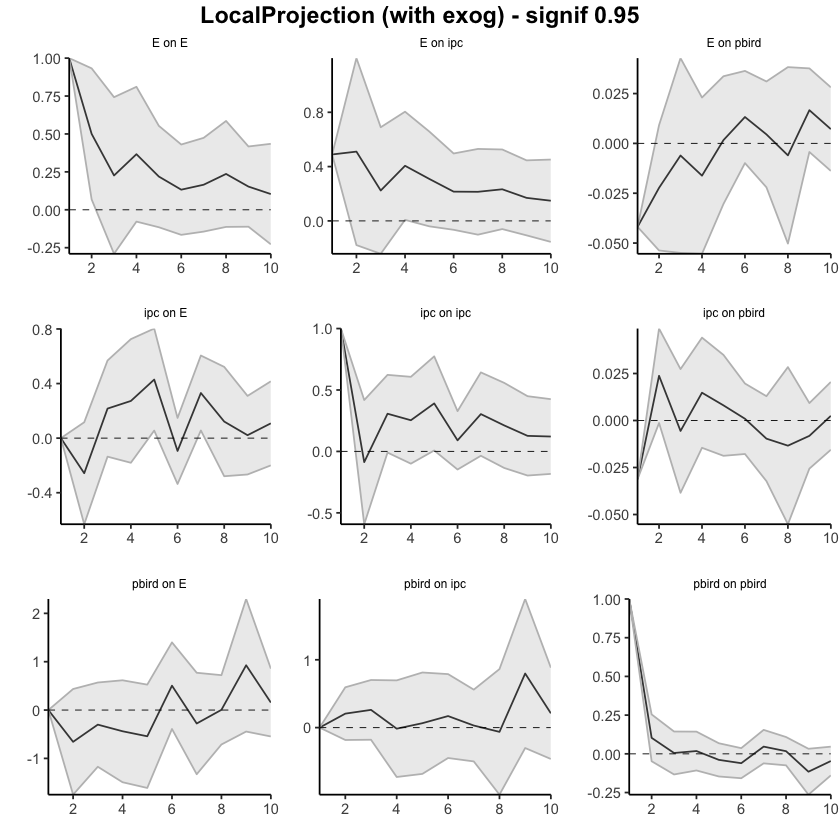

In [19]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 2, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.25721554 -0.6308290  0.1163979  
25 ipc     E         3      -0.04062059 -0.7665182  0.6852770  
26 ipc     E         4       0.23191223 -0.9470429  1.4108673  
27 ipc     E         5       0.66111538 -0.8916341  2.2138649  
28 ipc     E         6       0.56709869 -1.2276405  2.3618379  
29 ipc     E         7       0.89784885 -1.1714922  2.9671899  
30 ipc     E         8       1.01931177 -1.4506959  3.4893194  
31 ipc     E         9       1.04084940 -1.7170464  3.7987452  
32 ipc     E        10       1.14942284 -1.9165388  4.2153845  
33 ipc     E        11       1.30246997 -2.1277500  4.7326899

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.6572014  -1.749818  0.4354153  
47 pbird   E         3      -0.9587140  -2.922654  1.0052260  
48 pbird   E         4      -1.3970970  -4.415363  1.6211691  
49 pbird   E         5      -1.9396907  -6.026490  2.1471084  
50 pbird   E         6      -1.4356269  -6.417989  3.5467354  
51 pbird   E         7      -1.7137631  -7.745716  4.3181900  
52 pbird   E         8      -1.7091669  -8.458105  5.0397709  
53 pbird   E         9      -0.7828076  -8.902647  7.3370319  
54 pbird   E        10      -0.6279332  -9.449243  8.1933762  
55 pbird   E        11      -0.5491552 -10.077709  8.9793986

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4892780  0.48927804 0.489278   
2  E       ipc       2      0.9996606  0.31102932 1.688292   
3  E       ipc       3      1.2234069  0.06868784 2.378126   
4  E       ipc       4      1.6293722  0.07626808 3.182476   
5  E       ipc       5      1.9383408  0.03618823 3.840493   
6  E       ipc       6      2.1537993 -0.02938097 4.336980   
7  E       ipc       7      2.3680953 -0.13088621 4.867077   
8  E       ipc       8      2.6010099 -0.19107646 5.393096   
9  E       ipc       9      2.7706558 -0.29767911 5.838991   
10 E       ipc      10      2.9191875 -0.45241370 6.290789   
11 E       ipc      11      3.0563391 -0.65533618 6.768014

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.2059134 -0.1826160  0.5944427  
58 pbird   ipc       3      0.4673502 -0.3615321  1.2962326  
59 pbird   ipc       4      0.4513368 -1.0899218  1.9925953  
60 pbird   ipc       5      0.5164451 -1.7723563  2.8052465  
61 pbird   ipc       6      0.6867307 -2.2205979  3.5940593  
62 pbird   ipc       7      0.7172458 -2.7193415  4.1538332  
63 pbird   ipc       8      0.6543147 -3.7081261  5.0167556  
64 pbird   ipc       9      1.4519605 -4.0093605  6.9132815  
65 pbird   ipc      10      1.6623348 -4.4722171  7.7968866  
66 pbird   ipc      11      1.7082351 -4.9756792  8.3921495

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04186427 -0.04186427 -0.04186427
13 E       pbird     2      -0.06415755 -0.09558056 -0.03273455
14 E       pbird     3      -0.07023653 -0.15051939  0.01004632
15 E       pbird     4      -0.08641940 -0.20589783  0.03305904
16 E       pbird     5      -0.08476206 -0.23626818  0.06674406
17 E       pbird     6      -0.07152372 -0.24615809  0.10311066
18 E       pbird     7      -0.06700310 -0.26818492  0.13417873
19 E       pbird     8      -0.07299917 -0.31844513  0.17244678
20 E       pbird     9      -0.05633624 -0.32275724  0.21008475
21 E       pbird    10      -0.04918851 -0.33657807  0.23820104
22 E       pbird    11      -0.04575734 -0.36386446  0.27234978

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.031180243 -0.03118024 -0.03118024
35 ipc     pbird     2      -0.007395939 -0.03251889  0.01772702
36 ipc     pbird     3      -0.012955433 -0.07098338  0.04507252
37 ipc     pbird     4       0.001822216 -0.08550060  0.08914503
38 ipc     pbird     5       0.009874749 -0.10428043  0.12402993
39 ipc     pbird     6       0.010806142 -0.12209490  0.14370718
40 ipc     pbird     7       0.001152137 -0.15433251  0.15663679
41 ipc     pbird     8      -0.012231261 -0.20949777  0.18503525
42 ipc     pbird     9      -0.020395450 -0.23509500  0.19430410
43 ipc     pbird    10      -0.017907606 -0.25064018  0.21482496
44 ipc     pbird    11      -0.021252528 -0.27443320  0.23192815

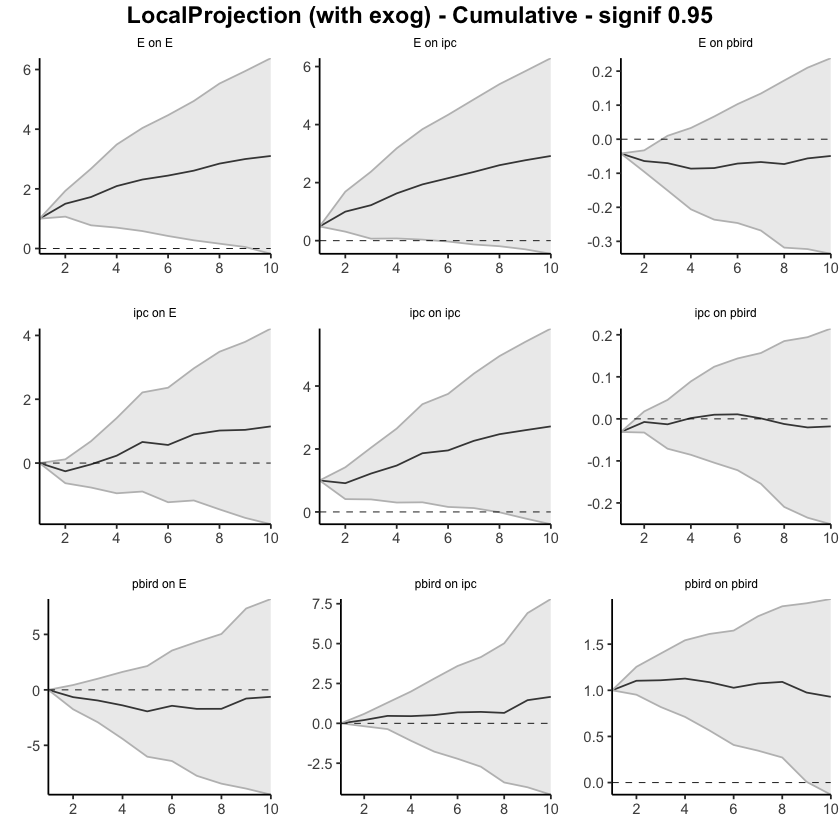

In [20]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value  lower_bound upper_bound
23 ipc     E         1       0.0000000  0.00000000  0.00000000
24 ipc     E         2      -0.3550775 -0.68917079 -0.02098428
25 ipc     E         3       0.2594191 -0.01571920  0.53455732
26 ipc     E         4       0.4543364  0.16056843  0.74810442
27 ipc     E         5       0.4559742  0.09019300  0.82175542
28 ipc     E         6      -0.1025747 -0.32292850  0.11777900
29 ipc     E         7       0.3466902  0.09072895  0.60265136
30 ipc     E         8       0.1306739 -0.25914307  0.52049088
31 ipc     E         9       0.0181716 -0.28183978  0.31818298
32 ipc     E        10       0.1026926 -0.18971424  0.39509952
33 ipc     E        11       0.1530071 -0.19482447  0.50083866

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.54760499 -1.7460297  0.6508198  
47 pbird   E         3      -0.44903491 -1.4743003  0.5762305  
48 pbird   E         4      -0.34219757 -1.4242765  0.7398813  
49 pbird   E         5      -0.78867790 -2.0572659  0.4799101  
50 pbird   E         6       0.61965031 -0.4559501  1.6952507  
51 pbird   E         7      -0.42993485 -1.6139734  0.7541037  
52 pbird   E         8      -0.20176077 -1.0513346  0.6478130  
53 pbird   E         9       0.87670629 -0.5132482  2.2666608  
54 pbird   E        10       0.14704280 -0.6940675  0.9881531  
55 pbird   E        11      -0.08560596 -0.8062013  0.6349894

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4749711  0.47497105 0.4749711  
2  E       ipc       2      0.4895921 -0.10752741 1.0867116  
3  E       ipc       3      0.2031604 -0.21927440 0.6255952  
4  E       ipc       4      0.3904035  0.03884219 0.7419648  
5  E       ipc       5      0.3058936 -0.01783159 0.6296188  
6  E       ipc       6      0.1998898 -0.07179979 0.4715793  
7  E       ipc       7      0.1657930 -0.10689854 0.4384845  
8  E       ipc       8      0.2452788 -0.04589956 0.5364571  
9  E       ipc       9      0.1799944 -0.08804128 0.4480301  
10 E       ipc      10      0.1530091 -0.13924233 0.4452605  
11 E       ipc      11      0.1466417 -0.17286368 0.4661471

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.37702400 -0.1181241  0.8721721  
58 pbird   ipc       3       0.18756320 -0.3236814  0.6988078  
59 pbird   ipc       4       0.04189995 -0.6515528  0.7353527  
60 pbird   ipc       5      -0.11779532 -0.9967523  0.7611617  
61 pbird   ipc       6       0.15289215 -0.5819879  0.8877722  
62 pbird   ipc       7      -0.06724496 -0.6686276  0.5341376  
63 pbird   ipc       8      -0.28475089 -1.4467714  0.8772696  
64 pbird   ipc       9       0.80398093 -0.3581212  1.9660831  
65 pbird   ipc      10       0.16351823 -0.6282037  0.9552402  
66 pbird   ipc      11       0.05867174 -0.6094249  0.7267684

impulse response horizon irf_value     lower_bound  upper_bound
12 E       pbird     1      -0.0398924949 -0.039892495 -0.03989249
13 E       pbird     2      -0.0214326118 -0.055485601  0.01262038
14 E       pbird     3      -0.0036816879 -0.049338472  0.04197510
15 E       pbird     4      -0.0156596071 -0.051232677  0.01991346
16 E       pbird     5       0.0015734211 -0.028604554  0.03175140
17 E       pbird     6       0.0142721498 -0.007741764  0.03628606
18 E       pbird     7       0.0040766845 -0.020341369  0.02849474
19 E       pbird     8      -0.0085536698 -0.052188788  0.03508145
20 E       pbird     9       0.0164268764 -0.002887606  0.03574136
21 E       pbird    10       0.0075864971 -0.013348413  0.02852141
22 E       pbird    11       0.0001652847 -0.035515282  0.03584585

impulse response horizon irf_value     lower_bound  upper_bound 
34 ipc     pbird     1      -0.0340851521 -0.034085152 -0.034085152
35 ipc     pbird     2       0.0182491387 -0.009752647  0.046250924
36 ipc     pbird     3      -0.0085593639 -0.037729171  0.020610444
37 ipc     pbird     4       0.0148859326 -0.011152926  0.040924791
38 ipc     pbird     5       0.0073724625 -0.017413889  0.032158814
39 ipc     pbird     6      -0.0003910799 -0.018441697  0.017659537
40 ipc     pbird     7      -0.0106440533 -0.031092579  0.009804472
41 ipc     pbird     8      -0.0165029650 -0.058488134  0.025482204
42 ipc     pbird     9      -0.0073014247 -0.022684219  0.008081370
43 ipc     pbird    10       0.0052241017 -0.012697169  0.023145372
44 ipc     pbird    11      -0.0034034518 -0.025737768  0.018930865

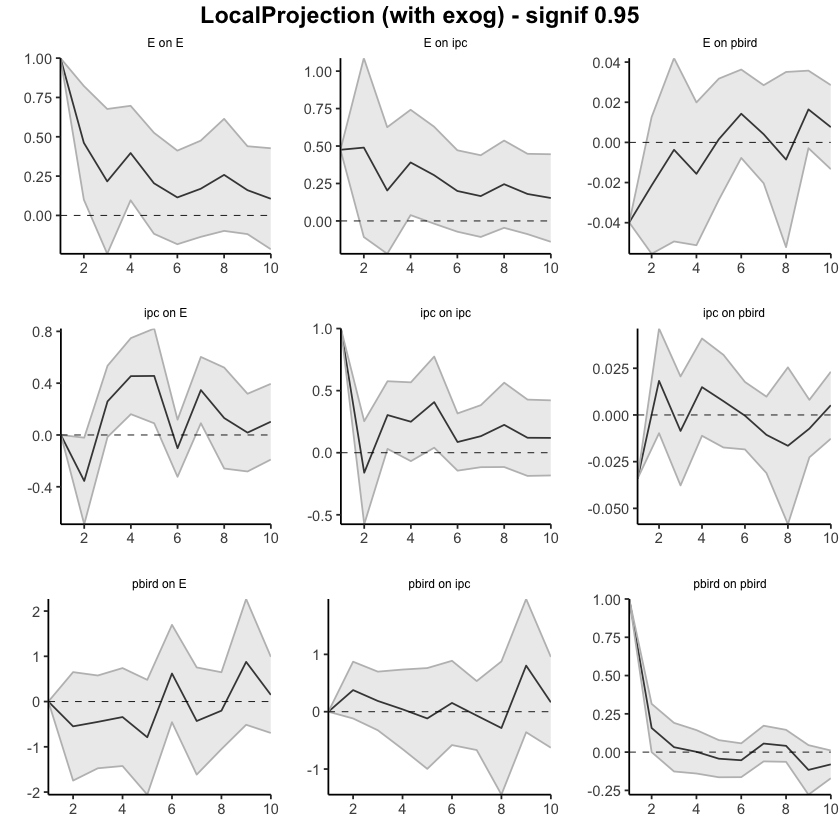

In [21]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 5, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.35507753 -0.6891708  -0.02098428
25 ipc     E         3      -0.09565848 -0.7048900   0.51357304
26 ipc     E         4       0.35867795 -0.5443216   1.26167747
27 ipc     E         5       0.81465216 -0.4541286   2.08343289
28 ipc     E         6       0.71207741 -0.7770571   2.20121189
29 ipc     E         7       1.05876757 -0.6863281   2.80386325
30 ipc     E         8       1.18944147 -0.9454712   3.32435413
31 ipc     E         9       1.20761307 -1.2273110   3.64253711
32 ipc     E        10       1.31030571 -1.4170252   4.03763663
33 ipc     E        11       1.46331281 -1.6118497   4.53847529

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.5476050  -1.746030  0.6508198  
47 pbird   E         3      -0.9966399  -3.220330  1.2270502  
48 pbird   E         4      -1.3388375  -4.644606  1.9669315  
49 pbird   E         5      -2.1275154  -6.701872  2.4468416  
50 pbird   E         6      -1.5078651  -7.157822  4.1420923  
51 pbird   E         7      -1.9377999  -8.771796  4.8961960  
52 pbird   E         8      -2.1395607  -9.823130  5.5440090  
53 pbird   E         9      -1.2628544 -10.336379  7.8106699  
54 pbird   E        10      -1.1158116 -11.030446  8.7988230  
55 pbird   E        11      -1.2014176 -11.836647  9.4338123

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4749711  0.474971051 0.4749711  
2  E       ipc       2      0.9645631  0.367443637 1.5616826  
3  E       ipc       3      1.1677236  0.148169237 2.1872779  
4  E       ipc       4      1.5581270  0.187011422 2.9292426  
5  E       ipc       5      1.8640207  0.169179835 3.5588615  
6  E       ipc       6      2.0639104  0.097380047 4.0304408  
7  E       ipc       7      2.2297034 -0.009518495 4.4689253  
8  E       ipc       8      2.4749822 -0.055418051 5.0053824  
9  E       ipc       9      2.6549766 -0.143459328 5.4534124  
10 E       ipc      10      2.8079857 -0.282701653 5.8986730  
11 E       ipc      11      2.9546274 -0.455565330 6.3648201

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.3770240 -0.1181241  0.8721721  
58 pbird   ipc       3      0.5645872 -0.4418056  1.5709799  
59 pbird   ipc       4      0.6064871 -1.0933583  2.3063326  
60 pbird   ipc       5      0.4886918 -2.0901107  3.0674943  
61 pbird   ipc       6      0.6415840 -2.6720986  3.9552665  
62 pbird   ipc       7      0.5743390 -3.3407262  4.4894042  
63 pbird   ipc       8      0.2895881 -4.7874976  5.3666738  
64 pbird   ipc       9      1.0935691 -5.1456188  7.3327569  
65 pbird   ipc      10      1.2570873 -5.7738225  8.2879970  
66 pbird   ipc      11      1.3157590 -6.3832474  9.0147655

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.03989249 -0.03989249 -0.03989249
13 E       pbird     2      -0.06132511 -0.09537810 -0.02727212
14 E       pbird     3      -0.06500679 -0.14471657  0.01470298
15 E       pbird     4      -0.08066640 -0.19594925  0.03461644
16 E       pbird     5      -0.07909298 -0.22455380  0.06636784
17 E       pbird     6      -0.06482083 -0.23229556  0.10265390
18 E       pbird     7      -0.06074415 -0.25263693  0.13114864
19 E       pbird     8      -0.06929782 -0.30482572  0.16623009
20 E       pbird     9      -0.05287094 -0.30771333  0.20197145
21 E       pbird    10      -0.04528444 -0.32106174  0.23049285
22 E       pbird    11      -0.04511916 -0.35657702  0.26633871

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.034085152 -0.03408515 -0.03408515
35 ipc     pbird     2      -0.015836013 -0.04383780  0.01216577
36 ipc     pbird     3      -0.024395377 -0.08156697  0.03277622
37 ipc     pbird     4      -0.009509445 -0.09271990  0.07370101
38 ipc     pbird     5      -0.002136982 -0.11013379  0.10585982
39 ipc     pbird     6      -0.002528062 -0.12857548  0.12351936
40 ipc     pbird     7      -0.013172115 -0.15966806  0.13332383
41 ipc     pbird     8      -0.029675080 -0.21815620  0.15880603
42 ipc     pbird     9      -0.036976505 -0.24084041  0.16688740
43 ipc     pbird    10      -0.031752403 -0.25353758  0.19003278
44 ipc     pbird    11      -0.035155855 -0.27927535  0.20896364

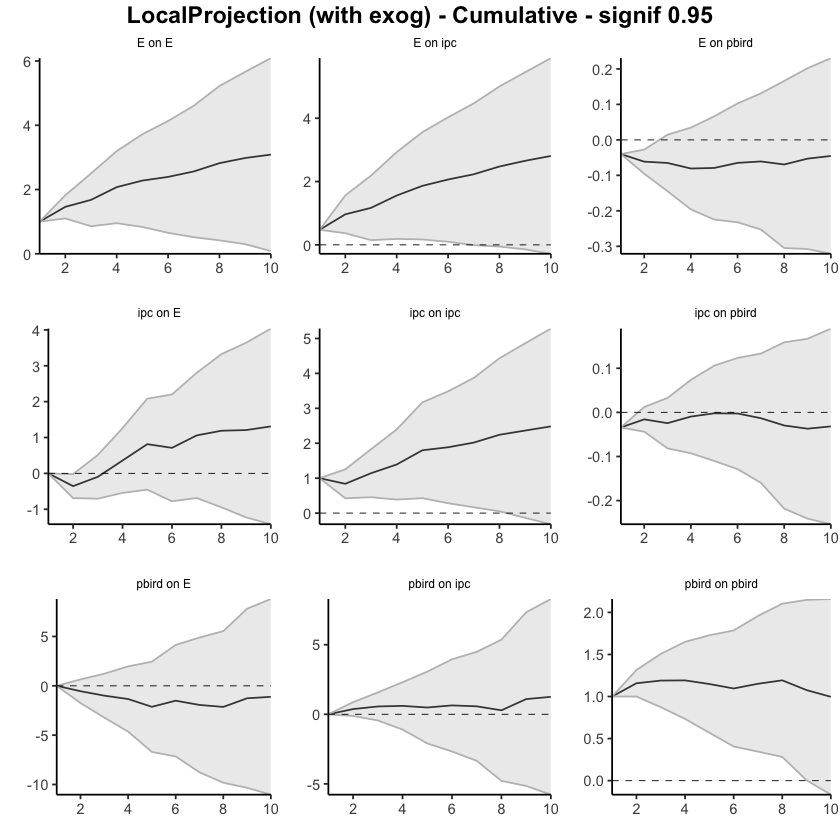

In [22]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.26329346 -0.64965025 0.1230633  
25 ipc     E         3       0.21550401 -0.10797229 0.5389803  
26 ipc     E         4       0.28634380 -0.15932069 0.7320083  
27 ipc     E         5       0.45064672  0.08114668 0.8201468  
28 ipc     E         6      -0.09775673 -0.33463100 0.1391175  
29 ipc     E         7       0.33655215  0.08771600 0.5853883  
30 ipc     E         8       0.13418213 -0.24869951 0.5170638  
31 ipc     E         9       0.03723348 -0.23477595 0.3092429  
32 ipc     E        10       0.10280693 -0.18105598 0.3866698  
33 ipc     E        11       0.12894964 -0.21198484 0.4698841

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.66403922 -1.7430491  0.4149707  
47 pbird   E         3      -0.32805554 -1.2063697  0.5502586  
48 pbird   E         4      -0.43861825 -1.4917850  0.6145485  
49 pbird   E         5      -0.49349547 -1.5305335  0.5435425  
50 pbird   E         6       0.46668912 -0.3947739  1.3281521  
51 pbird   E         7      -0.20459060 -1.1912991  0.7821179  
52 pbird   E         8       0.06066918 -0.6315423  0.7528806  
53 pbird   E         9       0.93232286 -0.3874303  2.2520760  
54 pbird   E        10       0.19835698 -0.4935950  0.8903090  
55 pbird   E        11       0.10561770 -0.5807960  0.7920314

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4892062  0.48920623 0.4892062  
2  E       ipc       2      0.5145432 -0.18538523 1.2144717  
3  E       ipc       3      0.2244504 -0.22565307 0.6745539  
4  E       ipc       4      0.4065971  0.02128373 0.7919105  
5  E       ipc       5      0.3034790 -0.03745160 0.6444095  
6  E       ipc       6      0.2100834 -0.05635819 0.4765250  
7  E       ipc       7      0.2116944 -0.09982076 0.5232096  
8  E       ipc       8      0.2315602 -0.05638291 0.5195034  
9  E       ipc       9      0.1644134 -0.10456939 0.4333961  
10 E       ipc      10      0.1524516 -0.14861054 0.4535137  
11 E       ipc      11      0.1512005 -0.18434019 0.4867412

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.20903054 -0.1821689  0.6002299  
58 pbird   ipc       3       0.22221503 -0.2301966  0.6746266  
59 pbird   ipc       4      -0.01325717 -0.7328597  0.7063454  
60 pbird   ipc       5       0.11474264 -0.5875151  0.8170004  
61 pbird   ipc       6       0.15429586 -0.4832569  0.7918486  
62 pbird   ipc       7       0.08057129 -0.4227908  0.5839334  
63 pbird   ipc       8      -0.01970327 -0.8821300  0.8427235  
64 pbird   ipc       9       0.80666647 -0.2814555  1.8947884  
65 pbird   ipc      10       0.24744617 -0.3768354  0.8717278  
66 pbird   ipc      11       0.05811004 -0.4705390  0.5867590

impulse response horizon irf_value    lower_bound  upper_bound 
12 E       pbird     1      -0.042174614 -0.042174614 -0.042174614
13 E       pbird     2      -0.022897568 -0.054960535  0.009165399
14 E       pbird     3      -0.006175765 -0.055685430  0.043333901
15 E       pbird     4      -0.015218640 -0.053867305  0.023430024
16 E       pbird     5       0.001481928 -0.029611851  0.032575707
17 E       pbird     6       0.013321031 -0.007862266  0.034504328
18 E       pbird     7       0.004105490 -0.022429990  0.030640970
19 E       pbird     8      -0.006511920 -0.049481459  0.036457620
20 E       pbird     9       0.017087715 -0.002956177  0.037131607
21 E       pbird    10       0.007206831 -0.014288916  0.028702578
22 E       pbird    11       0.001845539 -0.029386363  0.033077441

impulse response horizon irf_value     lower_bound   upper_bound
34 ipc     pbird     1      -0.0342535301 -0.0342535301 -0.03425353
35 ipc     pbird     2       0.0244109737 -0.0009502866  0.04977223
36 ipc     pbird     3      -0.0051439321 -0.0384169969  0.02812913
37 ipc     pbird     4       0.0127208728 -0.0156681556  0.04110990
38 ipc     pbird     5       0.0079430750 -0.0177540117  0.03364016
39 ipc     pbird     6       0.0004079535 -0.0166030548  0.01741896
40 ipc     pbird     7      -0.0101765272 -0.0314176759  0.01106462
41 ipc     pbird     8      -0.0137234822 -0.0539402211  0.02649326
42 ipc     pbird     9      -0.0078499781 -0.0246167066  0.00891675
43 ipc     pbird    10       0.0026330793 -0.0159554989  0.02122166
44 ipc     pbird    11      -0.0009005773 -0.0209667822  0.01916563

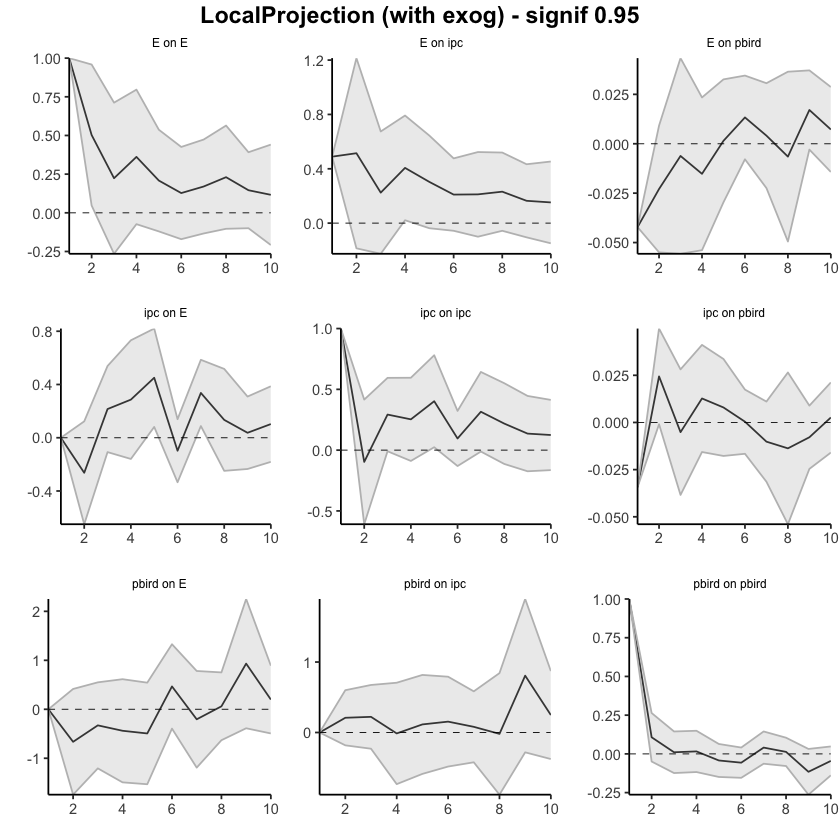

In [23]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 2, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   2   1   2   1   1   1   1   1   
2 ipc      2   2   2   1   2   1   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.26329346 -0.6496502  0.1230633  
25 ipc     E         3      -0.04778944 -0.7576225  0.6620437  
26 ipc     E         4       0.23855436 -0.9169432  1.3940520  
27 ipc     E         5       0.68920108 -0.8357965  2.2141987  
28 ipc     E         6       0.59144435 -1.1704275  2.3533162  
29 ipc     E         7       0.92799650 -1.0827115  2.9387046  
30 ipc     E         8       1.06217863 -1.3314111  3.4557683  
31 ipc     E         9       1.09941211 -1.5661870  3.7650112  
32 ipc     E        10       1.20221904 -1.7472430  4.1516811  
33 ipc     E        11       1.33116868 -1.9592278  4.6215652

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.000000   0.0000000  
46 pbird   E         2      -0.6640392 -1.743049   0.4149707  
47 pbird   E         3      -0.9920948 -2.949419   0.9652293  
48 pbird   E         4      -1.4307130 -4.441204   1.5797778  
49 pbird   E         5      -1.9242085 -5.971737   2.1233203  
50 pbird   E         6      -1.4575194 -6.366511   3.4514724  
51 pbird   E         7      -1.6621100 -7.557810   4.2335904  
52 pbird   E         8      -1.6014408 -8.189353   4.9864710  
53 pbird   E         9      -0.6691179 -8.576783   7.2385470  
54 pbird   E        10      -0.4707609 -9.070378   8.1288560  
55 pbird   E        11      -0.3651432 -9.651174   8.9208873

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4892062  0.489206227 0.4892062  
2  E       ipc       2      1.0037495  0.303820997 1.7036779  
3  E       ipc       3      1.2281999  0.078167928 2.3782318  
4  E       ipc       4      1.6347970  0.099451661 3.1701423  
5  E       ipc       5      1.9382759  0.062000061 3.8145518  
6  E       ipc       6      2.1483594  0.005641868 4.2910768  
7  E       ipc       7      2.3600538 -0.094178894 4.8142864  
8  E       ipc       8      2.5916140 -0.150561805 5.3337898  
9  E       ipc       9      2.7560274 -0.255131198 5.7671859  
10 E       ipc      10      2.9084789 -0.403741739 6.2206996  
11 E       ipc      11      3.0596794 -0.588081928 6.7074408

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.2090305 -0.1821689  0.6002299  
58 pbird   ipc       3      0.4312456 -0.4123654  1.2748566  
59 pbird   ipc       4      0.4179884 -1.1452251  1.9812019  
60 pbird   ipc       5      0.5327310 -1.7327403  2.7982023  
61 pbird   ipc       6      0.6870269 -2.2159972  3.5900510  
62 pbird   ipc       7      0.7675982 -2.6387880  4.1739843  
63 pbird   ipc       8      0.7478949 -3.5209180  5.0167079  
64 pbird   ipc       9      1.5545614 -3.8023735  6.9114963  
65 pbird   ipc      10      1.8020076 -4.1792089  7.7832241  
66 pbird   ipc      11      1.8601176 -4.6497479  8.3699831

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04217461 -0.04217461 -0.04217461
13 E       pbird     2      -0.06507218 -0.09713515 -0.03300921
14 E       pbird     3      -0.07124795 -0.15282058  0.01032469
15 E       pbird     4      -0.08646659 -0.20668788  0.03375471
16 E       pbird     5      -0.08498466 -0.23629974  0.06633042
17 E       pbird     6      -0.07166363 -0.24416200  0.10083475
18 E       pbird     7      -0.06755814 -0.26659199  0.13147572
19 E       pbird     8      -0.07407006 -0.31607345  0.16793334
20 E       pbird     9      -0.05698234 -0.31902963  0.20506494
21 E       pbird    10      -0.04977551 -0.33331854  0.23376752
22 E       pbird    11      -0.04792997 -0.36270491  0.26684496

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.034253530 -0.03425353 -0.03425353
35 ipc     pbird     2      -0.009842556 -0.03520382  0.01551870
36 ipc     pbird     3      -0.014986489 -0.07362081  0.04364784
37 ipc     pbird     4      -0.002265616 -0.08928897  0.08475774
38 ipc     pbird     5       0.005677459 -0.10704298  0.11839790
39 ipc     pbird     6       0.006085413 -0.12364604  0.13581686
40 ipc     pbird     7      -0.004091114 -0.15506371  0.14688148
41 ipc     pbird     8      -0.017814597 -0.20900393  0.17337474
42 ipc     pbird     9      -0.025664575 -0.23362064  0.18229149
43 ipc     pbird    10      -0.023031495 -0.24957614  0.20351315
44 ipc     pbird    11      -0.023932073 -0.27054292  0.22267878

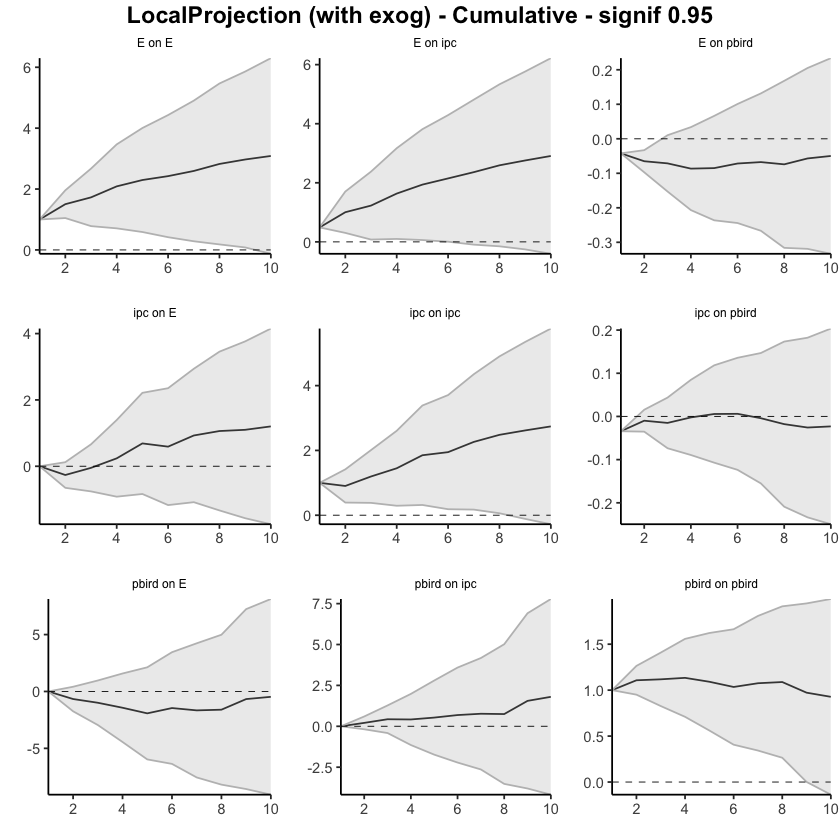

In [24]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.000000000
24 ipc     E         2      -0.35865030 -0.72152761 0.004227003
25 ipc     E         3       0.25523463 -0.00335206 0.513821318
26 ipc     E         4       0.39854763  0.08980730 0.707287955
27 ipc     E         5       0.45687451  0.09256285 0.821186165
28 ipc     E         6      -0.10390562 -0.34606901 0.138257770
29 ipc     E         7       0.32778394  0.08310835 0.572459526
30 ipc     E         8       0.13148182 -0.23427111 0.497234751
31 ipc     E         9       0.04120252 -0.23100474 0.313409791
32 ipc     E        10       0.11520226 -0.18246447 0.412868986
33 ipc     E        11       0.12890080 -0.20454464 0.462346247

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.63679798 -1.7996821  0.5260861  
47 pbird   E         3      -0.34532628 -1.3786813  0.6880287  
48 pbird   E         4      -0.38113088 -1.5126605  0.7503987  
49 pbird   E         5      -0.57287881 -1.6937644  0.5480068  
50 pbird   E         6       0.55595575 -0.4174177  1.5293292  
51 pbird   E         7      -0.20198893 -1.2679153  0.8639375  
52 pbird   E         8       0.03239964 -0.7193981  0.7841974  
53 pbird   E         9       0.97797714 -0.3575943  2.3135486  
54 pbird   E        10       0.12089137 -0.6287378  0.8705205  
55 pbird   E        11      -0.02831774 -0.7406929  0.6840575

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4745219  0.47452187 0.4745219  
2  E       ipc       2      0.4982855 -0.14518417 1.1417551  
3  E       ipc       3      0.2143356 -0.20772280 0.6363940  
4  E       ipc       4      0.3981320  0.02190409 0.7743599  
5  E       ipc       5      0.3009474 -0.03188663 0.6337815  
6  E       ipc       6      0.2034571 -0.07186068 0.4787749  
7  E       ipc       7      0.1636957 -0.09906727 0.4264587  
8  E       ipc       8      0.2314633 -0.04342323 0.5063498  
9  E       ipc       9      0.1692367 -0.08345155 0.4219250  
10 E       ipc      10      0.1477610 -0.15757257 0.4530946  
11 E       ipc      11      0.1465493 -0.18166343 0.4747620

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.28745679 -0.1474047  0.7223183  
58 pbird   ipc       3       0.26297329 -0.2240452  0.7499918  
59 pbird   ipc       4      -0.02419933 -0.7714214  0.7230227  
60 pbird   ipc       5       0.08367930 -0.7091727  0.8765313  
61 pbird   ipc       6       0.19663162 -0.4860474  0.8793107  
62 pbird   ipc       7      -0.06687503 -0.6564473  0.5226972  
63 pbird   ipc       8      -0.03056945 -0.9927970  0.9316581  
64 pbird   ipc       9       0.84249315 -0.2919380  1.9769243  
65 pbird   ipc      10       0.24655028 -0.3964661  0.8895666  
66 pbird   ipc      11       0.03840350 -0.5593098  0.6361168

impulse response horizon irf_value     lower_bound  upper_bound 
12 E       pbird     1      -0.0401836563 -0.040183656 -0.040183656
13 E       pbird     2      -0.0219994052 -0.051856752  0.007857941
14 E       pbird     3      -0.0048053362 -0.051183608  0.041572936
15 E       pbird     4      -0.0153947016 -0.051191504  0.020402101
16 E       pbird     5       0.0008831406 -0.030336453  0.032102735
17 E       pbird     6       0.0136692952 -0.007155092  0.034493682
18 E       pbird     7       0.0048247851 -0.021217949  0.030867519
19 E       pbird     8      -0.0064952727 -0.048529713  0.035539168
20 E       pbird     9       0.0173535893 -0.003154637  0.037861816
21 E       pbird    10       0.0072886027 -0.013215941  0.027793146
22 E       pbird    11       0.0002771972 -0.034882894  0.035437289

impulse response horizon irf_value    lower_bound  upper_bound 
34 ipc     pbird     1      -0.035964722 -0.035964722 -0.035964722
35 ipc     pbird     2       0.021376540 -0.003583536  0.046336616
36 ipc     pbird     3      -0.007210409 -0.037252978  0.022832161
37 ipc     pbird     4       0.015217440 -0.011439611  0.041874490
38 ipc     pbird     5       0.008778780 -0.016231296  0.033788855
39 ipc     pbird     6      -0.000762515 -0.017459308  0.015934278
40 ipc     pbird     7      -0.012221734 -0.032767762  0.008324293
41 ipc     pbird     8      -0.015488057 -0.054980412  0.024004298
42 ipc     pbird     9      -0.008424457 -0.024934607  0.008085693
43 ipc     pbird    10       0.003738339 -0.014836797  0.022313476
44 ipc     pbird    11      -0.002868943 -0.025395056  0.019657171

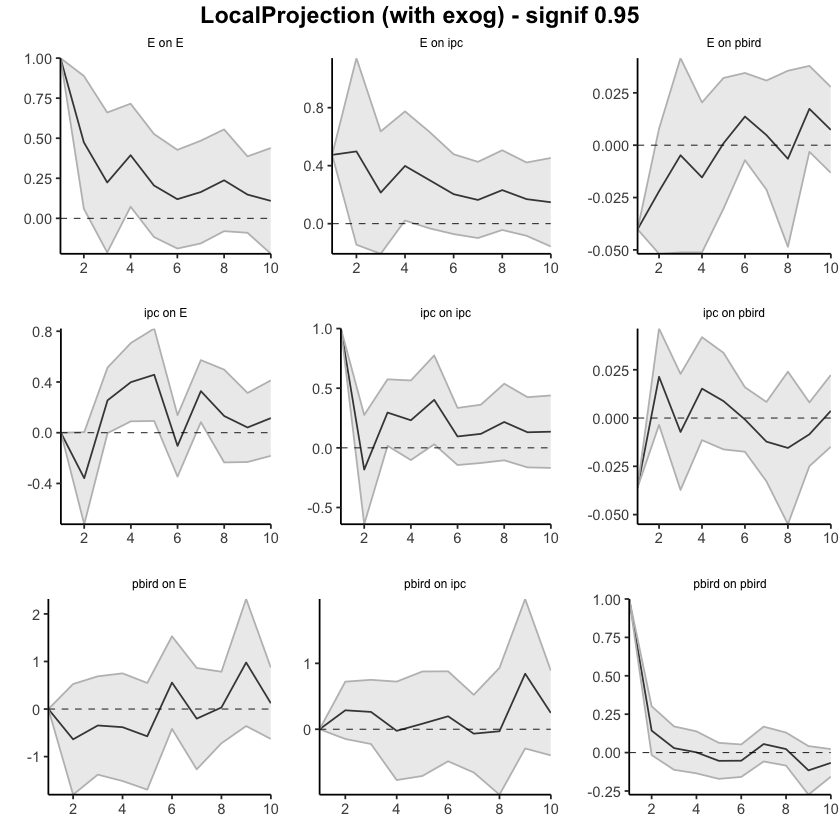

In [25]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 5, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            5        0     1          0.95    10  TRUE  
  nw_prewhite adjust_se use_twosls model_type starts ends column_names  endog
1 FALSE       FALSE     FALSE      0          1      259  E, ipc, pbird 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        5   4   3   1   2   1   1   1   1   1   
2 ipc      5   2   2   1   2   2   1   1   1   1   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value  lower_bound upper_bound
23 ipc     E         1       0.0000000  0.0000000  0.000000000
24 ipc     E         2      -0.3586503 -0.7215276  0.004227003
25 ipc     E         3      -0.1034157 -0.7248797  0.518048321
26 ipc     E         4       0.2951320 -0.6350724  1.225336277
27 ipc     E         5       0.7520065 -0.5425095  2.046522442
28 ipc     E         6       0.6481008 -0.8885785  2.184780212
29 ipc     E         7       0.9758848 -0.8054702  2.757239737
30 ipc     E         8       1.1073666 -1.0397413  3.254474488
31 ipc     E         9       1.1485691 -1.2707460  3.567884279
32 ipc     E        10       1.2637714 -1.4532105  3.980753265
33 ipc     E        11       1.3926722 -1.6577551  4.443099513

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.6367980  -1.799682  0.5260861  
47 pbird   E         3      -0.9821243  -3.178363  1.2141149  
48 pbird   E         4      -1.3632551  -4.691024  1.9645136  
49 pbird   E         5      -1.9361340  -6.384788  2.5125204  
50 pbird   E         6      -1.3801782  -6.802206  4.0418496  
51 pbird   E         7      -1.5821671  -8.070121  4.9057871  
52 pbird   E         8      -1.5497675  -8.789519  5.6899844  
53 pbird   E         9      -0.5717903  -9.147114  8.0035330  
54 pbird   E        10      -0.4508990  -9.775852  8.8740535  
55 pbird   E        11      -0.4792167 -10.516544  9.5581110

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4745219  0.47452187 0.4745219  
2  E       ipc       2      0.9728073  0.32933771 1.6162770  
3  E       ipc       3      1.1871429  0.12161490 2.2526709  
4  E       ipc       4      1.5852749  0.14351899 3.0270308  
5  E       ipc       5      1.8862224  0.11163236 3.6608124  
6  E       ipc       6      2.0896795  0.03977168 4.1395872  
7  E       ipc       7      2.2533752 -0.05929559 4.5660459  
8  E       ipc       8      2.4848384 -0.10271882 5.0723957  
9  E       ipc       9      2.6540752 -0.18617038 5.4943207  
10 E       ipc      10      2.8018362 -0.34374294 5.9474153  
11 E       ipc      11      2.9483854 -0.52540637 6.4221772

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.2874568 -0.1474047  0.7223183  
58 pbird   ipc       3      0.5504301 -0.3714499  1.4723101  
59 pbird   ipc       4      0.5262307 -1.1428713  2.1953328  
60 pbird   ipc       5      0.6099100 -1.8520440  3.0718641  
61 pbird   ipc       6      0.8065417 -2.3380914  3.9511747  
62 pbird   ipc       7      0.7396666 -2.9945387  4.4738719  
63 pbird   ipc       8      0.7090972 -3.9873357  5.4055301  
64 pbird   ipc       9      1.5515904 -4.2792737  7.3824544  
65 pbird   ipc      10      1.7981406 -4.6757398  8.2720210  
66 pbird   ipc      11      1.8365441 -5.2350495  8.9081378

impulse response horizon irf_value   lower_bound upper_bound 
12 E       pbird     1      -0.04018366 -0.04018366 -0.040183656
13 E       pbird     2      -0.06218306 -0.09204041 -0.032325715
14 E       pbird     3      -0.06698840 -0.14322402  0.009247221
15 E       pbird     4      -0.08238310 -0.19441552  0.029649322
16 E       pbird     5      -0.08149996 -0.22475197  0.061752056
17 E       pbird     6      -0.06783066 -0.23190707  0.096245739
18 E       pbird     7      -0.06300588 -0.25312501  0.127113258
19 E       pbird     8      -0.06950115 -0.30165473  0.162652425
20 E       pbird     9      -0.05214756 -0.30480936  0.200514241
21 E       pbird    10      -0.04485896 -0.31802531  0.228307387
22 E       pbird    11      -0.04458176 -0.35290820  0.263744676

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.035964722 -0.03596472 -0.03596472
35 ipc     pbird     2      -0.014588182 -0.03954826  0.01037189
36 ipc     pbird     3      -0.021798591 -0.07680124  0.03320405
37 ipc     pbird     4      -0.006581151 -0.08824085  0.07507854
38 ipc     pbird     5       0.002197628 -0.10447214  0.10886740
39 ipc     pbird     6       0.001435113 -0.12193145  0.12480168
40 ipc     pbird     7      -0.010786621 -0.15469921  0.13312597
41 ipc     pbird     8      -0.026274678 -0.20967962  0.15713027
42 ipc     pbird     9      -0.034699136 -0.23461423  0.16521596
43 ipc     pbird    10      -0.030960796 -0.24945103  0.18752944
44 ipc     pbird    11      -0.033829739 -0.27484609  0.20718661

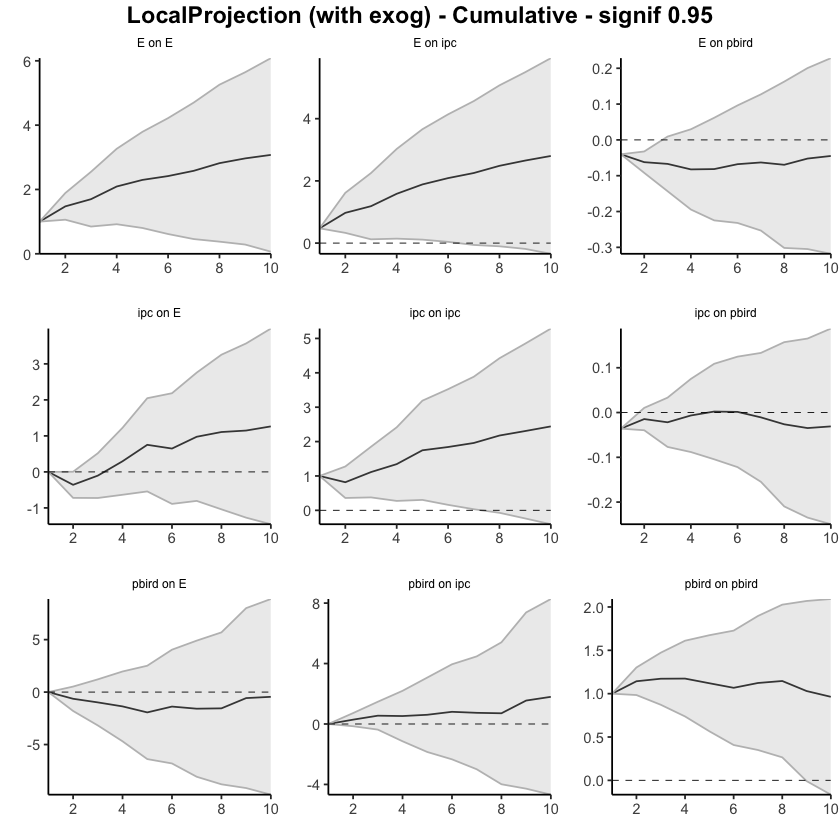

In [26]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)